In [575]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
sns.set()

In [263]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [264]:
df.shape

(145460, 23)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [266]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [267]:
df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)

In [268]:
df.apply(pd.isnull).sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [269]:
df['Location'].nunique()

49

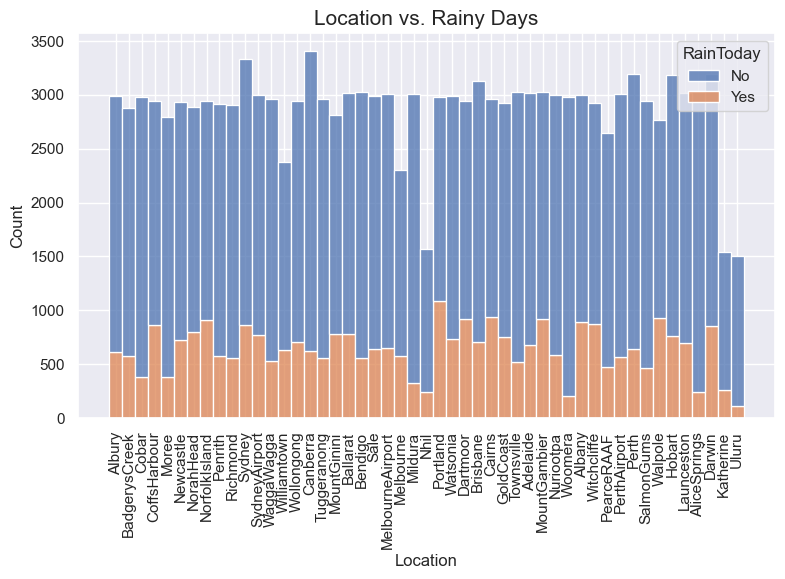

In [270]:
plt.figure(figsize = (9, 5))
sns.histplot(data = df, x = 'Location', hue = 'RainToday', multiple = 'stack')
plt.title('Location vs. Rainy Days', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

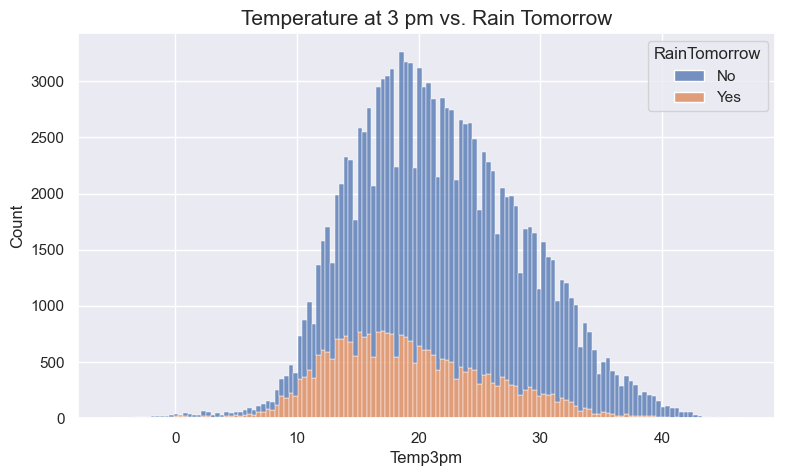

In [271]:
plt.figure(figsize = (9, 5))
sns.histplot(data = df, x = 'Temp3pm', hue = 'RainTomorrow', multiple = 'stack')
plt.title('Temperature at 3 pm vs. Rain Tomorrow', fontsize = 15)
plt.show()

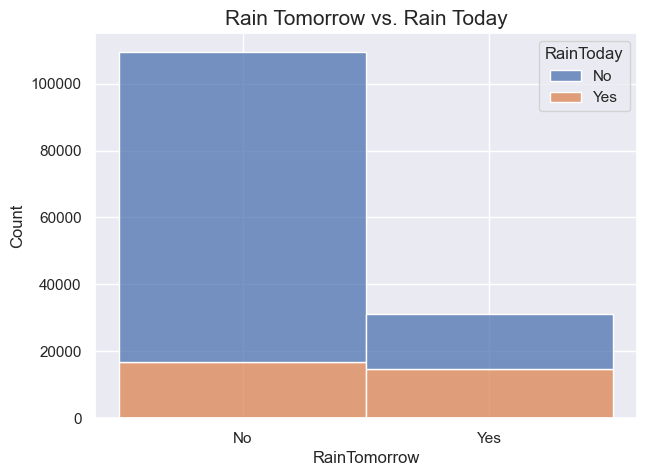

In [272]:
plt.figure(figsize = (7, 5))
sns.histplot(data = df, x = 'RainTomorrow', hue = 'RainToday', multiple = 'stack')
plt.title('Rain Tomorrow vs. Rain Today', fontsize = 15)
plt.show()

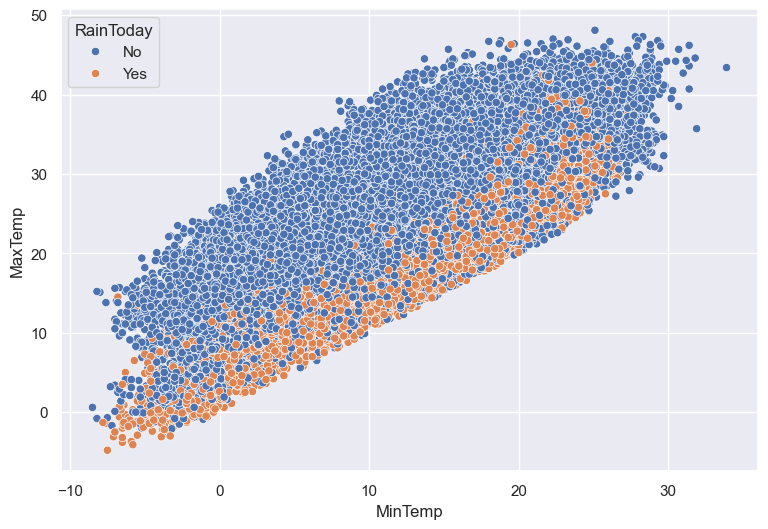

In [273]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df, x = 'MinTemp', y = 'MaxTemp', hue = 'RainToday')
plt.show()

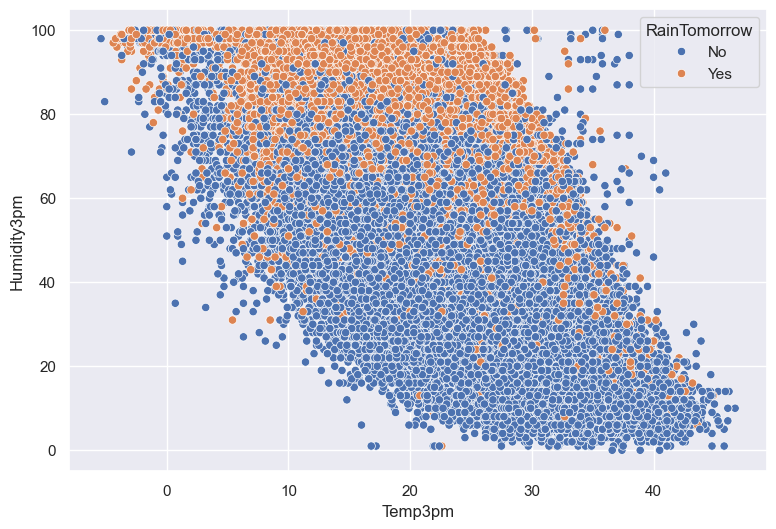

In [274]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df, x = 'Temp3pm', y = 'Humidity3pm', hue = 'RainTomorrow')
plt.show()

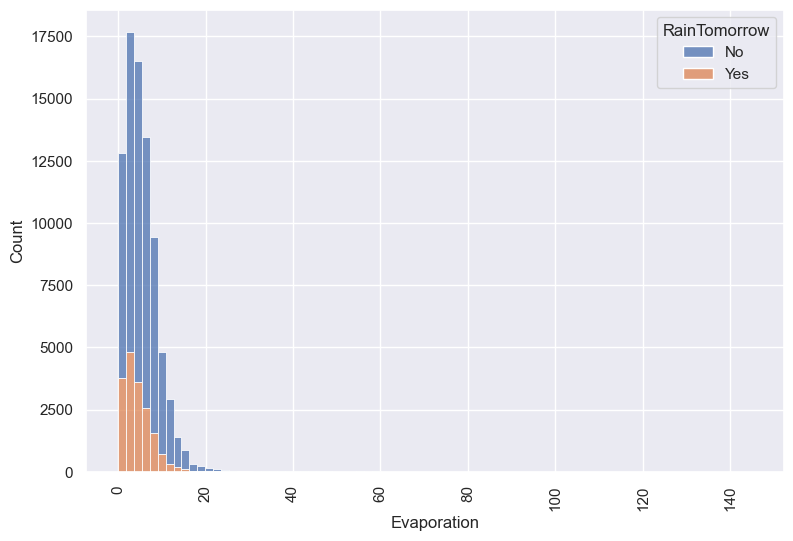

In [275]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df, x = 'Evaporation', hue = 'RainTomorrow', multiple = 'stack', bins = 80)
plt.xticks(rotation = 90)
plt.show()

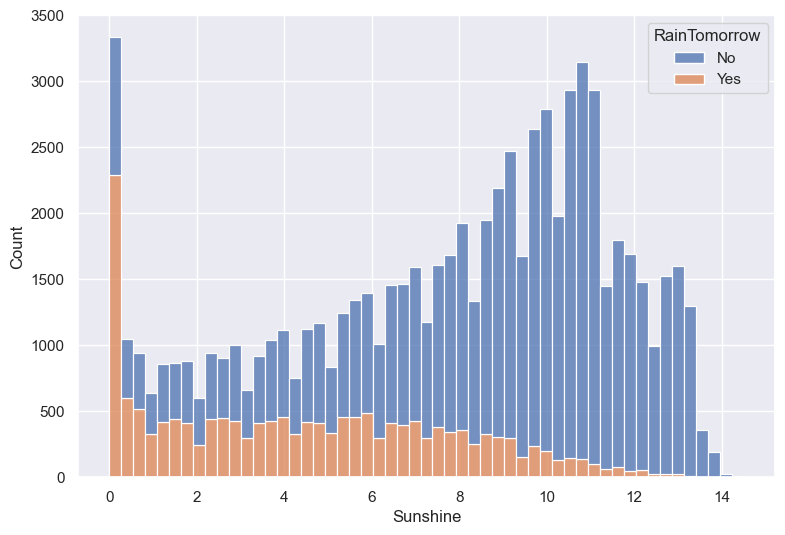

In [276]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df, x = 'Sunshine', hue = 'RainTomorrow', multiple = 'stack')
plt.show()

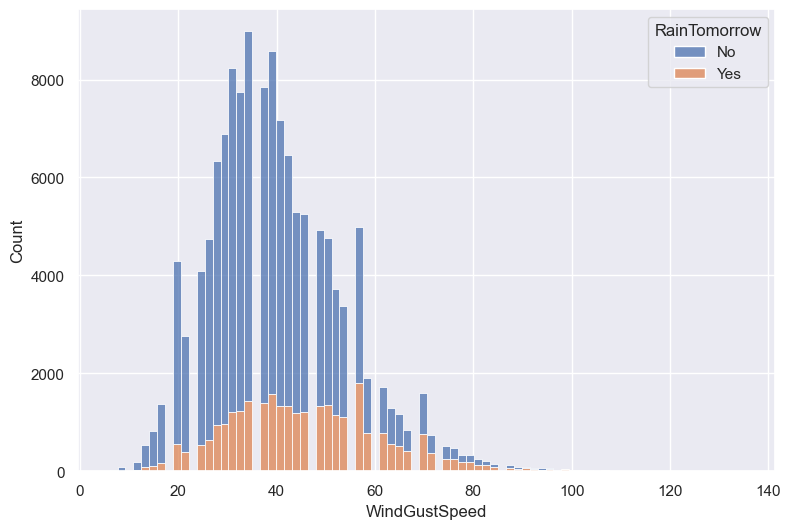

In [277]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df, x = 'WindGustSpeed', hue = 'RainTomorrow', multiple = 'stack', bins = 80)
plt.show()

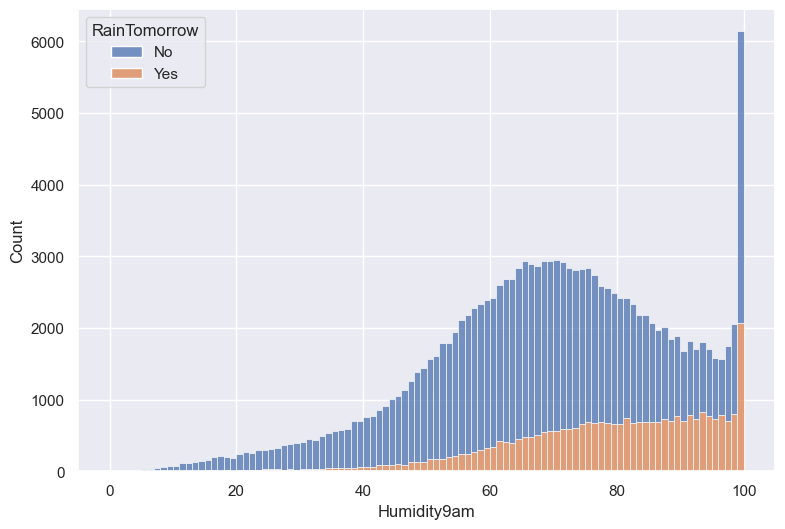

In [278]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df, x = 'Humidity9am', hue = 'RainTomorrow', multiple = 'stack')
plt.show()

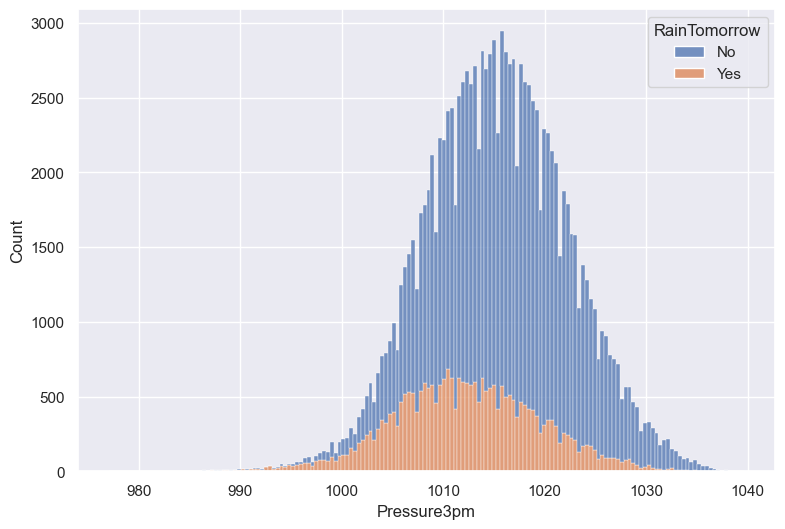

In [279]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df, x = 'Pressure3pm', hue = 'RainTomorrow', multiple = 'stack')
plt.show()

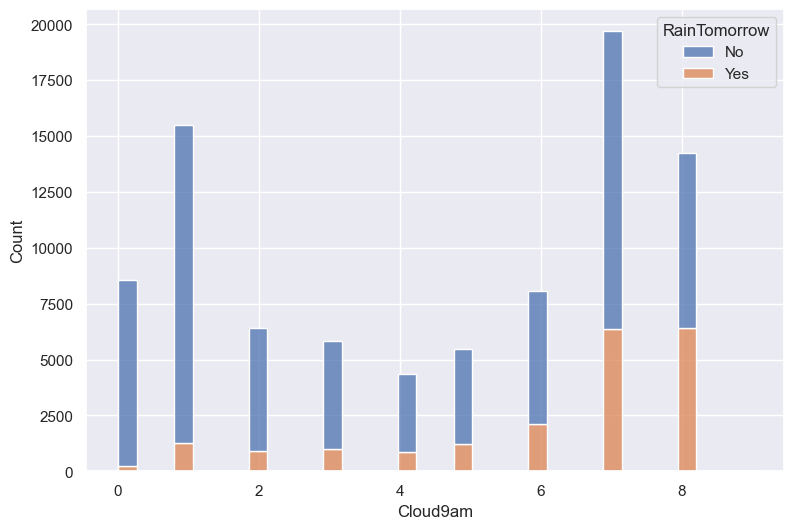

In [280]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df, x = 'Cloud9am', hue = 'RainTomorrow', multiple = 'stack')
plt.show()

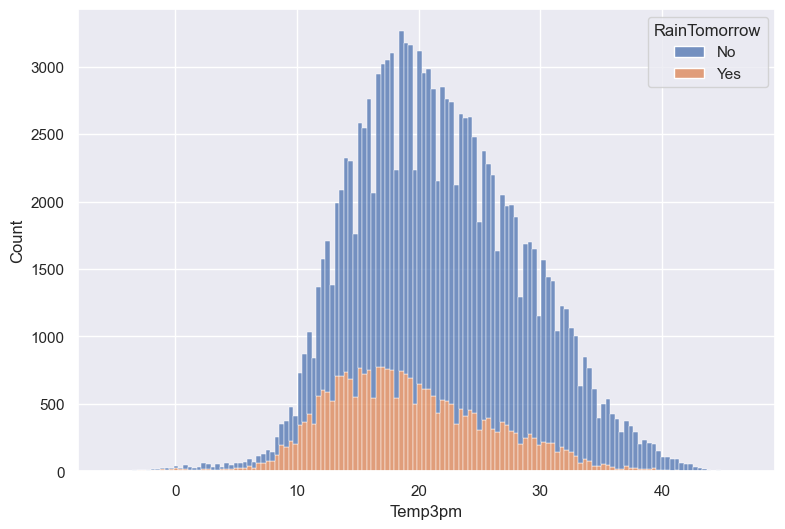

In [281]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df, x = 'Temp3pm', hue = 'RainTomorrow', multiple = 'stack')
plt.show()

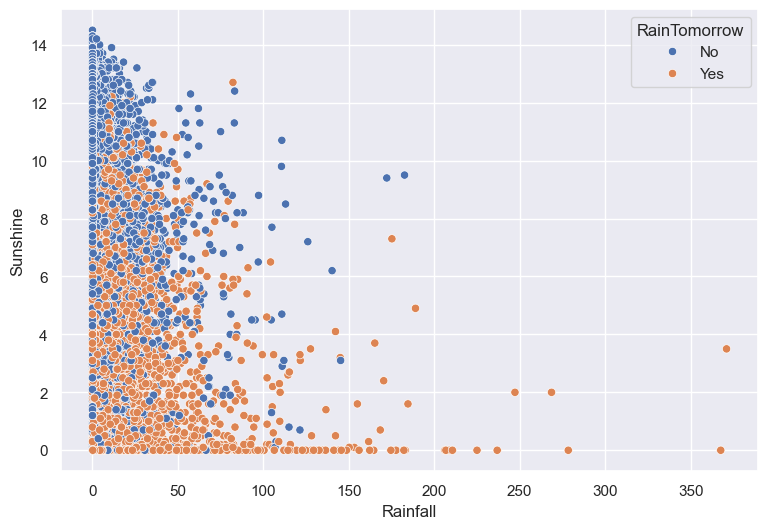

In [282]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df, x = 'Rainfall', y = 'Sunshine', hue = 'RainTomorrow')
plt.show()

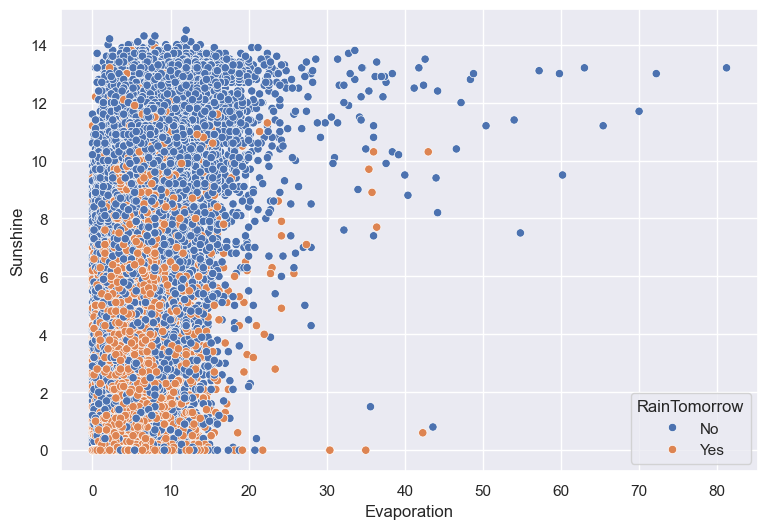

In [283]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df, x = 'Evaporation', y = 'Sunshine', hue = 'RainTomorrow')
plt.show()

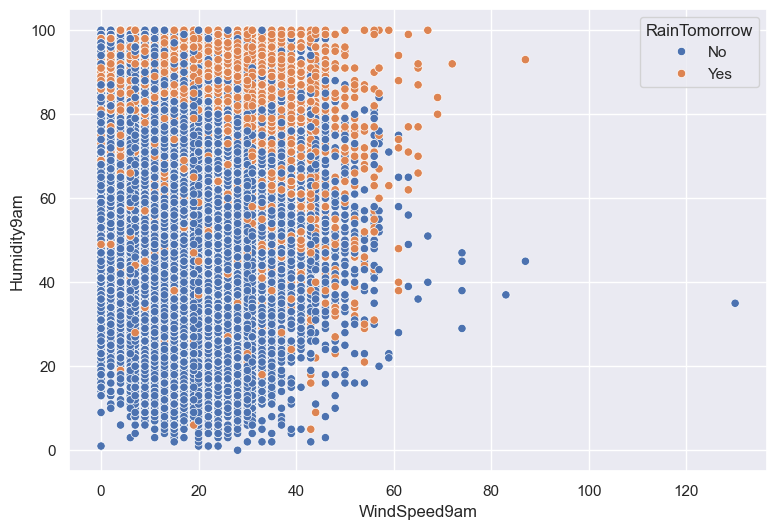

In [284]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df, x = 'WindSpeed9am', y = 'Humidity9am', hue = 'RainTomorrow')
plt.show()

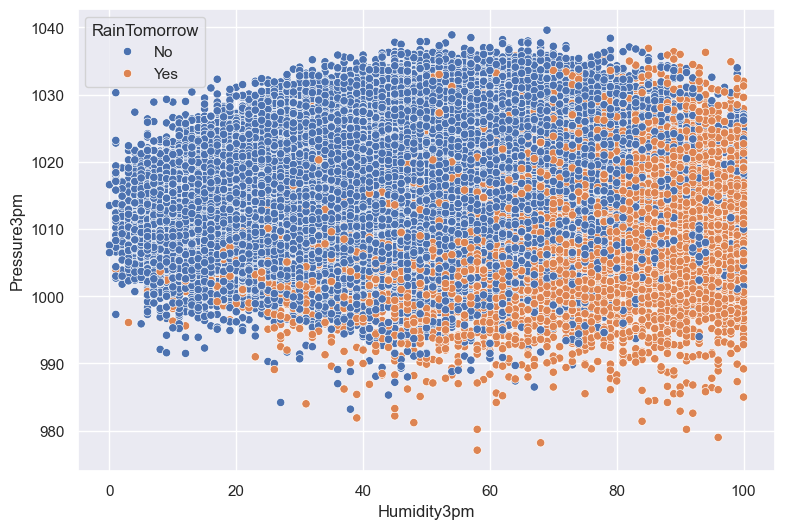

In [285]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df, x = 'Humidity3pm', y = 'Pressure3pm', hue = 'RainTomorrow')
plt.show()

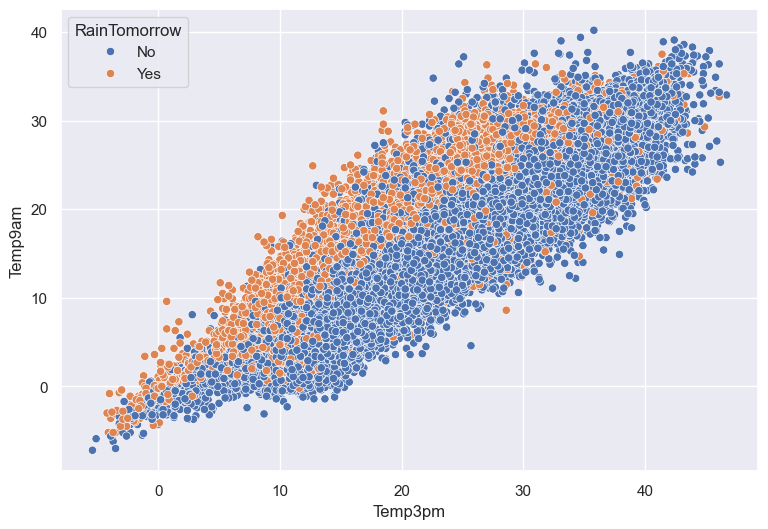

In [286]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df, x = 'Temp3pm', y = 'Temp9am', hue = 'RainTomorrow')
plt.show()

In [287]:
train_val_df, test_df = train_test_split(df, test_size = 0.2, random_state = 101, shuffle = True, stratify = df['RainTomorrow'])
train_df, val_df = train_test_split(train_val_df, test_size = 0.1, random_state = 101, shuffle = True, stratify = train_val_df['RainTomorrow'])

In [288]:
print('The training set size is:', train_df.shape)
print('The test set size is:', test_df.shape)
print('The validation set size is:', val_df.shape)

The training set size is: (101366, 23)
The test set size is: (28158, 23)
The validation set size is: (11263, 23)


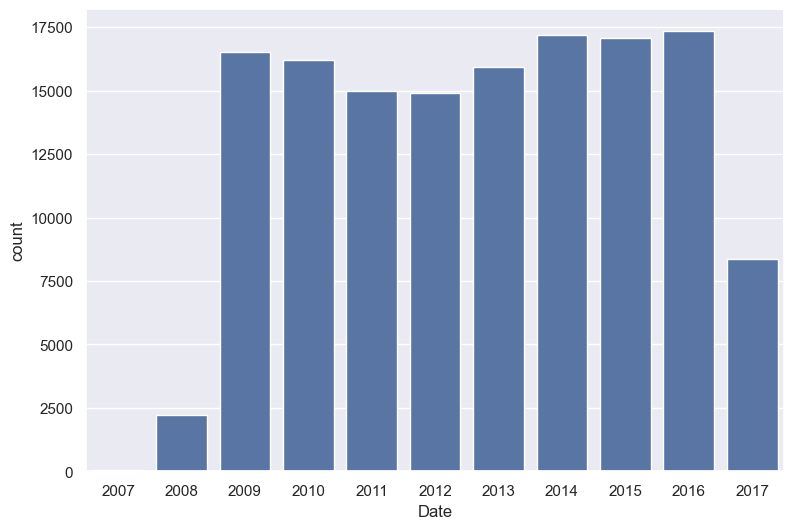

In [289]:
plt.figure(figsize = (9, 6))
sns.countplot(x = pd.to_datetime(df['Date']).dt.year)
plt.show()

In [290]:
year = pd.to_datetime(df['Date']).dt.year

In [291]:
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [292]:
print('The train set size is:', train_df.shape)
print('The test set size is:', test_df.shape)
print('The validation set size is:', val_df.shape)

The train set size is: (97988, 23)
The test set size is: (25710, 23)
The validation set size is: (17089, 23)


In [293]:
input_cols = list(train_df.columns)[1: -1]
target_col = 'RainTomorrow'

In [294]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [295]:
target_col

'RainTomorrow'

In [296]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [297]:
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [298]:
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [299]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [300]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [301]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [302]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [303]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [304]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [305]:
df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [306]:
df.shape

(140787, 23)

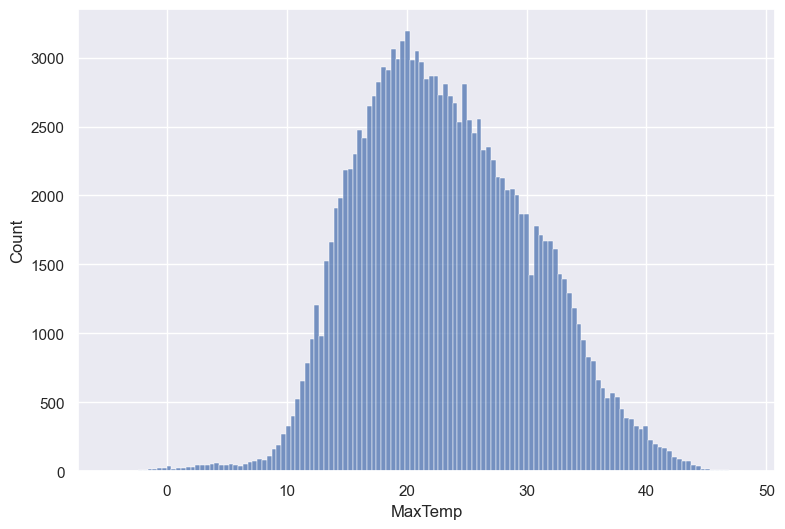

In [307]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df, x = 'MaxTemp')
plt.show()

In [308]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [309]:
df['MaxTemp'] = imputer.fit_transform(df[['MaxTemp']])

In [310]:
df_1 = df[df['MaxTemp'] <= 20]

In [311]:
df_1.shape

(51202, 23)

In [312]:
df_1.isna().sum()

Date                 0
Location             0
MinTemp            135
MaxTemp              0
Rainfall             0
Evaporation      23614
Sunshine         25770
WindGustDir       3433
WindGustSpeed     3393
WindDir9am        4589
WindDir3pm        1571
WindSpeed9am       339
WindSpeed3pm       866
Humidity9am        849
Humidity3pm       1146
Pressure9am       5958
Pressure3pm       5944
Cloud9am         20354
Cloud3pm         21303
Temp9am            385
Temp3pm            745
RainToday            0
RainTomorrow         0
dtype: int64

In [313]:
df_2 = df[df['MaxTemp'] <= 30]
df_2 = df_2[df_2['MaxTemp'] > 20]

In [314]:
df_2.shape

(63371, 23)

In [315]:
df_2.isna().sum()

Date                 0
Location             0
MinTemp            254
MaxTemp              0
Rainfall             0
Evaporation      27880
Sunshine         30448
WindGustDir       4886
WindGustSpeed     4874
WindDir9am        4138
WindDir3pm        1792
WindSpeed9am       577
WindSpeed3pm      1397
Humidity9am        488
Humidity3pm       1356
Pressure9am       6064
Pressure3pm       6086
Cloud9am         24545
Cloud3pm         26233
Temp9am            216
Temp3pm           1076
RainToday            0
RainTomorrow         0
dtype: int64

In [316]:
df_3 = df[df['MaxTemp'] > 30]

In [317]:
df_3.shape

(26214, 23)

In [318]:
df_1['MinTemp'] = imputer.fit_transform(df_1[['MinTemp']])

In [319]:
df_1.shape

(51202, 23)

In [320]:
df_2['MinTemp'] = imputer.fit_transform(df_2[['MinTemp']])

In [321]:
df_2.shape

(63371, 23)

In [322]:
df_3['MinTemp'] = imputer.fit_transform(df_3[['MinTemp']])

In [323]:
df_3.shape

(26214, 23)

In [324]:
df_t = pd.concat([df_1, df_2, df_3])

In [325]:
df_t.shape

(140787, 23)

In [326]:
df_t.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [327]:
df_t.corr(numeric_only = True)['Evaporation'].sort_values(ascending = False)

Evaporation      1.000000
MaxTemp          0.588679
Temp3pm          0.574311
Temp9am          0.545382
MinTemp          0.467175
Sunshine         0.366659
WindGustSpeed    0.203396
WindSpeed9am     0.194398
WindSpeed3pm     0.129166
Rainfall        -0.064549
Cloud3pm        -0.184395
Cloud9am        -0.185211
Pressure9am     -0.269850
Pressure3pm     -0.293098
Humidity3pm     -0.393149
Humidity9am     -0.506055
Name: Evaporation, dtype: float64

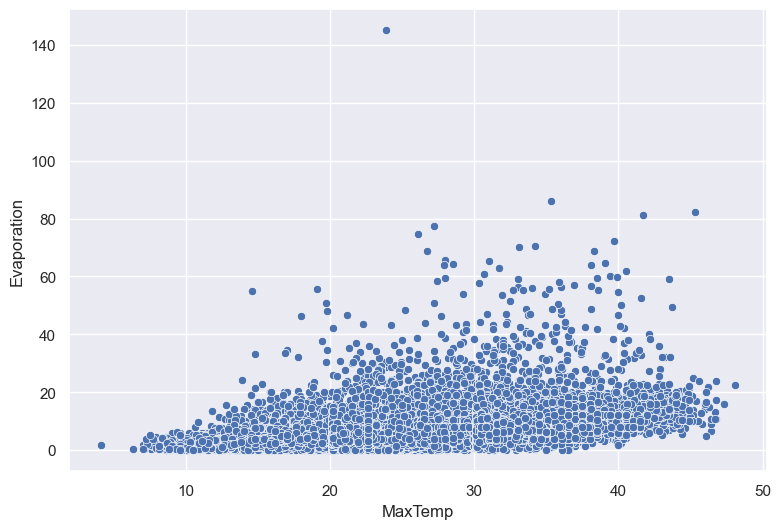

In [328]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df_t, x = 'MaxTemp', y = 'Evaporation')
plt.show()

In [329]:
df_1['Evaporation'] = imputer.fit_transform(df_1[['Evaporation']])

In [330]:
df_2['Evaporation'] = imputer.fit_transform(df_2[['Evaporation']])

In [331]:
df_3['Evaporation'] = imputer.fit_transform(df_3[['Evaporation']])

In [332]:
df_t = pd.concat([df_1, df_2, df_3])

In [333]:
df_t.shape

(140787, 23)

In [334]:
df_t.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [335]:
df_t.corr(numeric_only = True)['Sunshine'].sort_values(ascending = False)

Sunshine         1.000000
Temp3pm          0.490386
MaxTemp          0.470083
Evaporation      0.367305
Temp9am          0.291364
MinTemp          0.073381
WindSpeed3pm     0.056480
Pressure9am      0.041071
WindSpeed9am     0.009188
Pressure3pm     -0.020276
WindGustSpeed   -0.032196
Rainfall        -0.227525
Humidity9am     -0.492784
Humidity3pm     -0.629638
Cloud9am        -0.675846
Cloud3pm        -0.704621
Name: Sunshine, dtype: float64

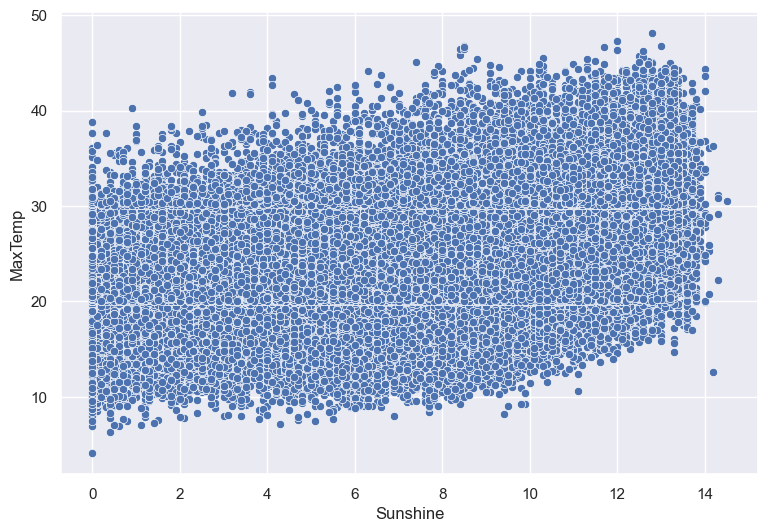

In [336]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df_t, x = 'Sunshine', y = 'MaxTemp')
plt.show()

In [337]:
df_1 = df_t[df_t['MaxTemp'] <= 20]

In [338]:
df_2 = df_t[df_t['MaxTemp'] <= 30]
df_2 = df_2[df_2['MaxTemp'] > 20]

In [339]:
df_3 = df_t[df_t['MaxTemp'] > 30]

In [340]:
df_1['Sunshine'].median()

np.float64(5.9)

In [341]:
df_2['Sunshine'].median()

np.float64(9.2)

In [342]:
df_3['Sunshine'].median()

np.float64(10.8)

In [343]:
df_1['Sunshine'] = imputer.fit_transform(df_1[['Sunshine']])

In [344]:
df_2['Sunshine'] = imputer.fit_transform(df_2[['Sunshine']])

In [345]:
df_3['Sunshine'] = imputer.fit_transform(df_3[['Sunshine']])

In [346]:
df_t = pd.concat([df_1, df_2, df_3])

In [347]:
df_t.shape

(140787, 23)

In [348]:
df_t.apply(pd.isnull).sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

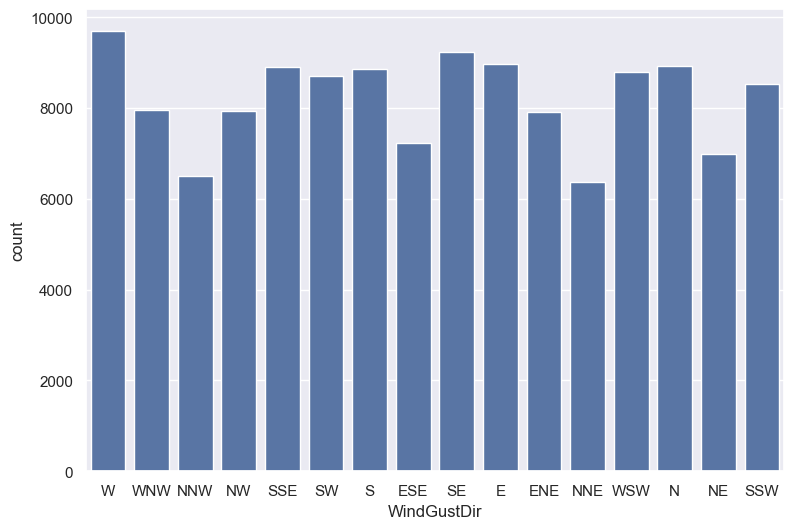

In [349]:
plt.figure(figsize = (9, 6))
sns.countplot(data = df_t, x = 'WindGustDir')
plt.show()

In [350]:
df_t.dropna(subset = ['WindGustDir'], inplace = True)

In [351]:
df_t.shape

(131624, 23)

In [352]:
df_t.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am        7249
WindDir3pm         904
WindSpeed9am       105
WindSpeed3pm       231
Humidity9am       1180
Humidity3pm       1801
Pressure9am      10037
Pressure3pm      10050
Cloud9am         51270
Cloud3pm         53365
Temp9am            394
Temp3pm            989
RainToday            0
RainTomorrow         0
dtype: int64

In [353]:
df_t.dropna(subset = ['WindDir9am', 'WindDir3pm'], inplace = True)

In [354]:
df_t.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am       1012
Humidity3pm       1522
Pressure9am       9120
Pressure3pm       9069
Cloud9am         46234
Cloud3pm         48233
Temp9am            343
Temp3pm            795
RainToday            0
RainTomorrow         0
dtype: int64

In [355]:
df_t.shape

(123710, 23)

In [356]:
df_t.corr(numeric_only = True)['Humidity9am'].sort_values(ascending = False)

Humidity9am      1.000000
Humidity3pm      0.682607
Cloud9am         0.463653
Cloud3pm         0.366149
Rainfall         0.238322
Pressure3pm      0.166740
Pressure9am      0.113730
WindSpeed3pm    -0.100896
WindGustSpeed   -0.177381
MinTemp         -0.217689
WindSpeed9am    -0.219894
Sunshine        -0.441851
Temp9am         -0.463262
Evaporation     -0.478542
Temp3pm         -0.503890
MaxTemp         -0.508818
Name: Humidity9am, dtype: float64

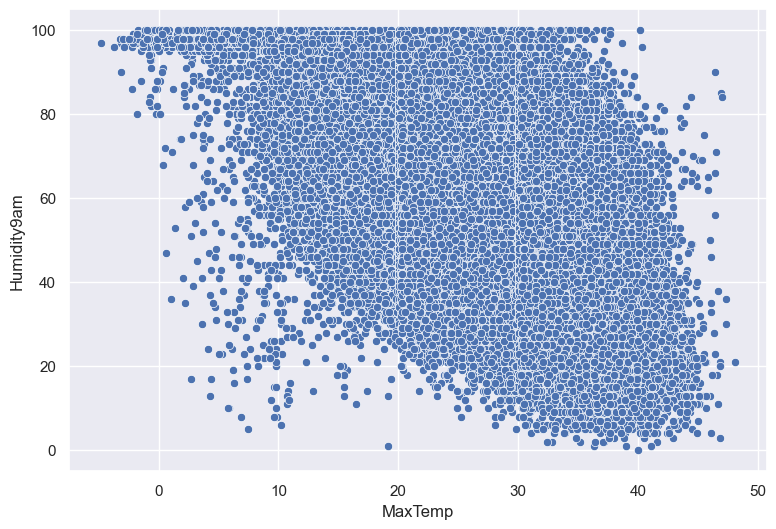

In [357]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df_t, x = 'MaxTemp', y = 'Humidity9am')
plt.show()

In [358]:
df_1 = df_t[df_t['MaxTemp'] <= 20]

In [359]:
df_2 = df_t[df_t['MaxTemp'] <= 30]
df_2 = df_2[df_2['MaxTemp'] > 20]

In [360]:
df_3 = df_t[df_t['MaxTemp'] > 30]

In [361]:
df_1['Humidity9am'].median()

np.float64(79.0)

In [362]:
df_2['Humidity9am'].median()

np.float64(67.0)

In [363]:
df_3['Humidity9am'].median()

np.float64(55.0)

In [364]:
df_1['Humidity9am'] = imputer.fit_transform(df_1[['Humidity9am']])

In [365]:
df_2['Humidity9am'] = imputer.fit_transform(df_2[['Humidity9am']])

In [366]:
df_3['Humidity9am'] = imputer.fit_transform(df_3[['Humidity9am']])

In [367]:
df_t = pd.concat([df_1, df_2, df_3])

In [368]:
df_t.shape

(123710, 23)

In [369]:
df_t.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm       1522
Pressure9am       9120
Pressure3pm       9069
Cloud9am         46234
Cloud3pm         48233
Temp9am            343
Temp3pm            795
RainToday            0
RainTomorrow         0
dtype: int64

In [370]:
df_t.corr(numeric_only = True)['Humidity3pm'].sort_values(ascending = False)

Humidity3pm      1.000000
Humidity9am      0.682022
Cloud3pm         0.528289
Cloud9am         0.522538
Rainfall         0.261310
Pressure3pm      0.045769
WindSpeed3pm     0.044258
MinTemp         -0.001316
WindGustSpeed   -0.011879
WindSpeed9am    -0.012812
Pressure9am     -0.035940
Temp9am         -0.231467
Evaporation     -0.406757
MaxTemp         -0.515522
Sunshine        -0.537834
Temp3pm         -0.563302
Name: Humidity3pm, dtype: float64

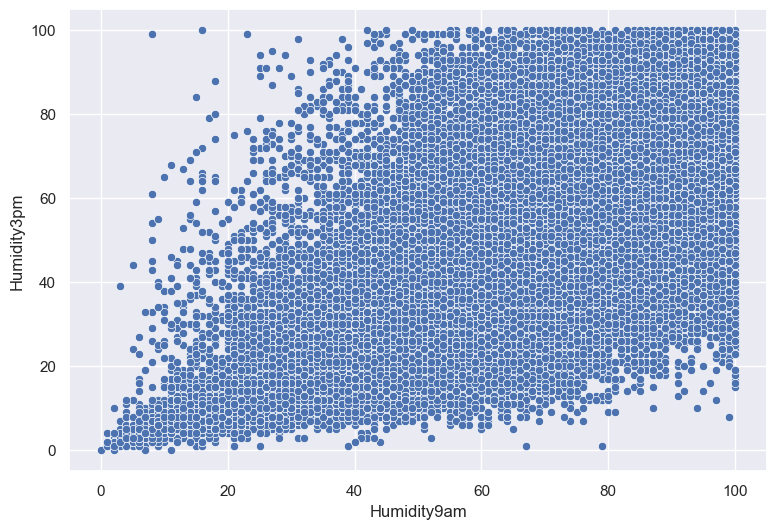

In [371]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df_t, x = 'Humidity9am', y = 'Humidity3pm')
plt.show()

In [372]:
df_1 = df_t[df_t['Humidity9am'] <= 40]

In [373]:
df_2 = df_t[df_t['Humidity9am'] <= 80]
df_2 = df_2[df_2['Humidity9am'] > 40]

In [374]:
df_3 = df_t[df_t['Humidity9am'] > 80]

In [375]:
df_1['Humidity3pm'].median()

np.float64(17.0)

In [376]:
df_2['Humidity3pm'].median()

np.float64(48.0)

In [377]:
df_3['Humidity3pm'].median()

np.float64(67.0)

In [378]:
df_1['Humidity3pm'] = imputer.fit_transform(df_1[['Humidity3pm']])

In [379]:
df_2['Humidity3pm'] = imputer.fit_transform(df_2[['Humidity3pm']])

In [380]:
df_3['Humidity3pm'] = imputer.fit_transform(df_3[['Humidity3pm']])

In [381]:
df_t['Humidity3pm'].median()

np.float64(51.0)

In [382]:
df_t = pd.concat([df_1, df_2, df_3])

In [383]:
df_t.shape

(123710, 23)

In [384]:
df_t.apply(pd.isnull).sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am       9120
Pressure3pm       9069
Cloud9am         46234
Cloud3pm         48233
Temp9am            343
Temp3pm            795
RainToday            0
RainTomorrow         0
dtype: int64

In [385]:
df_t.corr(numeric_only = True)['Pressure9am'].sort_values(ascending = False)

Pressure9am      1.000000
Pressure3pm      0.960119
Humidity9am      0.114283
Sunshine        -0.024090
Humidity3pm     -0.036062
Cloud9am        -0.138511
Cloud3pm        -0.150695
Rainfall        -0.169103
WindSpeed9am    -0.200161
Evaporation     -0.247379
Temp3pm         -0.270902
WindSpeed3pm    -0.280921
MaxTemp         -0.315750
Temp9am         -0.403322
MinTemp         -0.436695
WindGustSpeed   -0.443551
Name: Pressure9am, dtype: float64

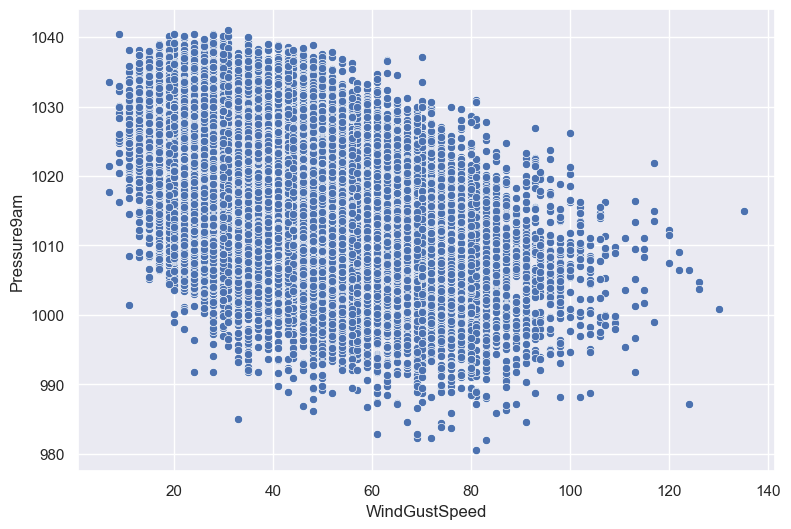

In [386]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df_t, x = 'WindGustSpeed', y = 'Pressure9am')
plt.show()

In [387]:
df_1 = df_t[df_t['WindGustSpeed'] < 40]

In [388]:
df_2 = df_t[df_t['WindGustSpeed'] <= 70]
df_2 = df_2[df_2['WindGustSpeed'] >= 40]

In [389]:
df_3 = df_t[df_t['WindGustSpeed'] > 70]

In [390]:
df_1['Pressure9am'] = imputer.fit_transform(df_1[['Pressure9am']])

In [391]:
df_2['Pressure9am'] = imputer.fit_transform(df_2[['Pressure9am']])

In [392]:
df_3['Pressure9am'] = imputer.fit_transform(df_3[['Pressure9am']])

In [393]:
df_t = pd.concat([df_1, df_2, df_3])

In [394]:
df_t.shape

(123710, 23)

In [395]:
df_t.shape

(123710, 23)

In [396]:
df_t.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm       9069
Cloud9am         46234
Cloud3pm         48233
Temp9am            343
Temp3pm            795
RainToday            0
RainTomorrow         0
dtype: int64

In [397]:
df_t.corr(numeric_only = True)['Pressure3pm'].sort_values(ascending = False)

Pressure3pm      1.000000
Pressure9am      0.959744
Humidity9am      0.167461
Humidity3pm      0.045460
Cloud9am        -0.068653
Cloud3pm        -0.086853
Sunshine        -0.088742
Rainfall        -0.127462
WindSpeed9am    -0.148357
WindSpeed3pm    -0.240195
Evaporation     -0.284842
Temp3pm         -0.379157
WindGustSpeed   -0.397554
MaxTemp         -0.416132
MinTemp         -0.452945
Temp9am         -0.458027
Name: Pressure3pm, dtype: float64

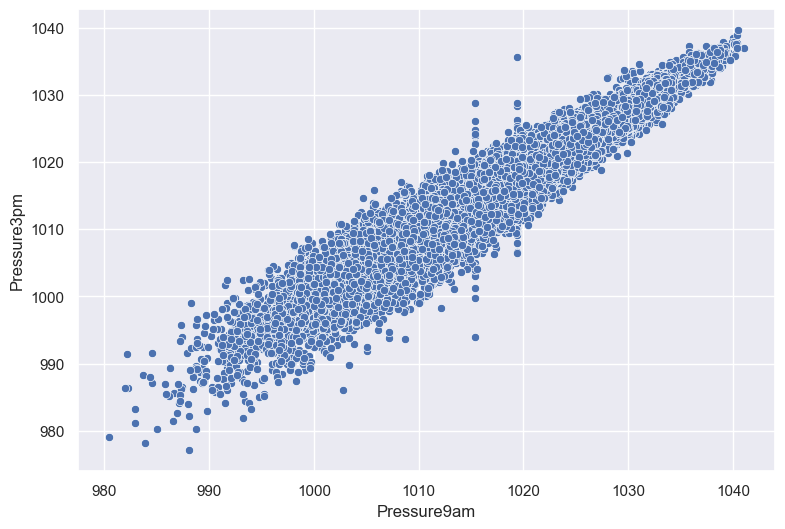

In [398]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df_t, x = 'Pressure9am', y = 'Pressure3pm')
plt.show()

In [399]:
df_1 = df_t[df_t['Pressure9am'] <= 1000]

In [400]:
df_2 = df_t[df_t['Pressure9am'] <= 1020]
df_2 = df_2[df_2['Pressure9am'] > 1000]

In [401]:
df_3 = df_t[df_t['Pressure9am'] > 1020]

In [402]:
df_1['Pressure3pm'] = imputer.fit_transform(df_1[['Pressure3pm']])

In [403]:
df_2['Pressure3pm'] = imputer.fit_transform(df_2[['Pressure3pm']])

In [404]:
df_3['Pressure3pm'] = imputer.fit_transform(df_3[['Pressure3pm']])

In [405]:
df_t = pd.concat([df_1, df_2, df_3])

In [406]:
df_t.shape

(123710, 23)

In [407]:
df_t.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         46234
Cloud3pm         48233
Temp9am            343
Temp3pm            795
RainToday            0
RainTomorrow         0
dtype: int64

In [408]:
df_t.corr(numeric_only = True)['Cloud9am'].sort_values(ascending = False)

Cloud9am         1.000000
Cloud3pm         0.607529
Humidity3pm      0.521128
Humidity9am      0.463242
Rainfall         0.201395
WindGustSpeed    0.080301
WindSpeed3pm     0.067539
MinTemp          0.064600
WindSpeed9am     0.030173
Pressure3pm     -0.070723
Pressure9am     -0.137553
Temp9am         -0.151259
Evaporation     -0.216607
MaxTemp         -0.297302
Temp3pm         -0.311204
Sunshine        -0.594893
Name: Cloud9am, dtype: float64

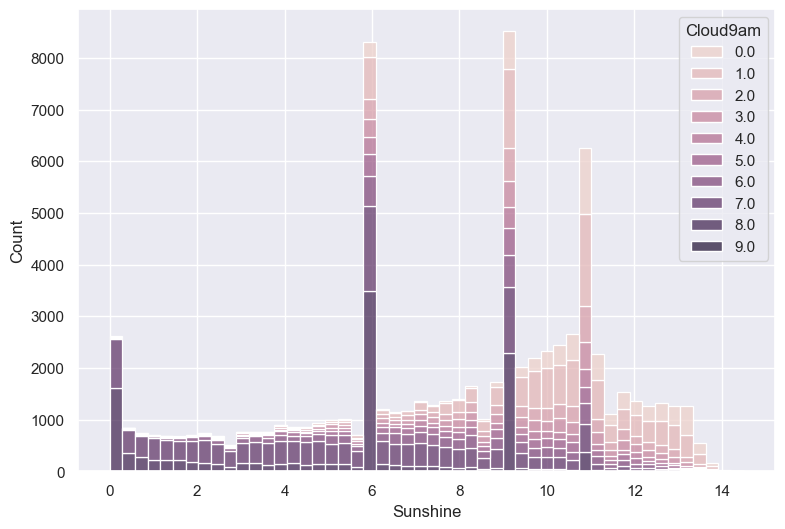

In [409]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df_t, x = 'Sunshine', hue = 'Cloud9am', multiple = 'stack', bins = 50)
plt.show()

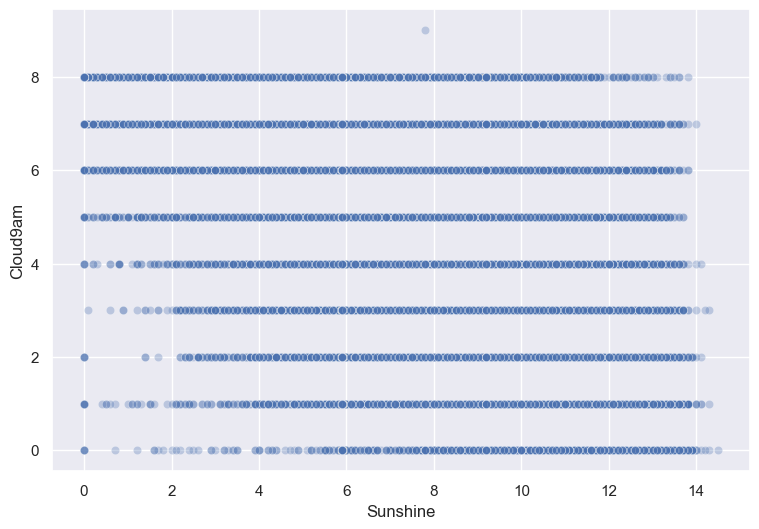

In [410]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df_t, x = 'Sunshine', y = 'Cloud9am', alpha = 0.3)
plt.show()

In [411]:
df_1 = df_t[df_t['Sunshine'] <= 5]

In [412]:
df_2 = df_t[df_t['Sunshine'] < 10]
df_2 = df_2[df_2['Sunshine'] > 5]

In [413]:
df_3 = df_t[df_t['Sunshine'] >= 10]

In [414]:
df_1['Cloud9am'] = imputer.fit_transform(df_1[['Cloud9am']])

In [415]:
df_2['Cloud9am'] = imputer.fit_transform(df_2[['Cloud9am']])

In [416]:
df_3['Cloud9am'] = imputer.fit_transform(df_3[['Cloud9am']])

In [417]:
df_t = pd.concat([df_1, df_2, df_3])

In [418]:
df_t.shape

(123710, 23)

In [419]:
df_t.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm         48233
Temp9am            343
Temp3pm            795
RainToday            0
RainTomorrow         0
dtype: int64

In [420]:
df_t.corr(numeric_only = True)['Cloud3pm'].sort_values(ascending = False)

Cloud3pm         1.000000
Cloud9am         0.591424
Humidity3pm      0.527393
Humidity9am      0.366070
Rainfall         0.173878
WindGustSpeed    0.116661
WindSpeed9am     0.059476
WindSpeed3pm     0.041023
MinTemp          0.010636
Pressure3pm     -0.087899
Temp9am         -0.137907
Pressure9am     -0.149836
Evaporation     -0.210567
MaxTemp         -0.286152
Temp3pm         -0.325092
Sunshine        -0.616752
Name: Cloud3pm, dtype: float64

In [421]:
df_1['Cloud3pm'] = imputer.fit_transform(df_1[['Cloud3pm']])

In [422]:
df_2['Cloud3pm'] = imputer.fit_transform(df_2[['Cloud3pm']])

In [423]:
df_3['Cloud3pm'] = imputer.fit_transform(df_3[['Cloud3pm']])

In [424]:
df_t = pd.concat([df_1, df_2, df_3])

In [425]:
df_t.shape

(123710, 23)

In [426]:
df_t.apply(pd.isnull).sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am          343
Temp3pm          795
RainToday          0
RainTomorrow       0
dtype: int64

In [427]:
df.corr(numeric_only = True)['Temp9am'].sort_values(ascending = False)

Temp9am          1.000000
MinTemp          0.901828
MaxTemp          0.886276
Temp3pm          0.860633
Evaporation      0.545382
Sunshine         0.291364
WindSpeed3pm     0.163972
WindGustSpeed    0.150574
WindSpeed9am     0.129108
Rainfall         0.011477
Cloud3pm        -0.128150
Cloud9am        -0.138127
Humidity3pm     -0.222227
Pressure9am     -0.422635
Pressure3pm     -0.470316
Humidity9am     -0.473305
Name: Temp9am, dtype: float64

In [428]:
df.corr(numeric_only = True)['Temp3pm'].sort_values(ascending = False)

Temp3pm          1.000000
MaxTemp          0.984105
Temp9am          0.860633
MinTemp          0.708716
Evaporation      0.574311
Sunshine         0.490386
WindGustSpeed    0.033511
WindSpeed3pm     0.028845
WindSpeed9am     0.004878
Rainfall        -0.079178
Pressure9am     -0.286890
Cloud9am        -0.302840
Cloud3pm        -0.318336
Pressure3pm     -0.389684
Humidity9am     -0.500528
Humidity3pm     -0.558562
Name: Temp3pm, dtype: float64

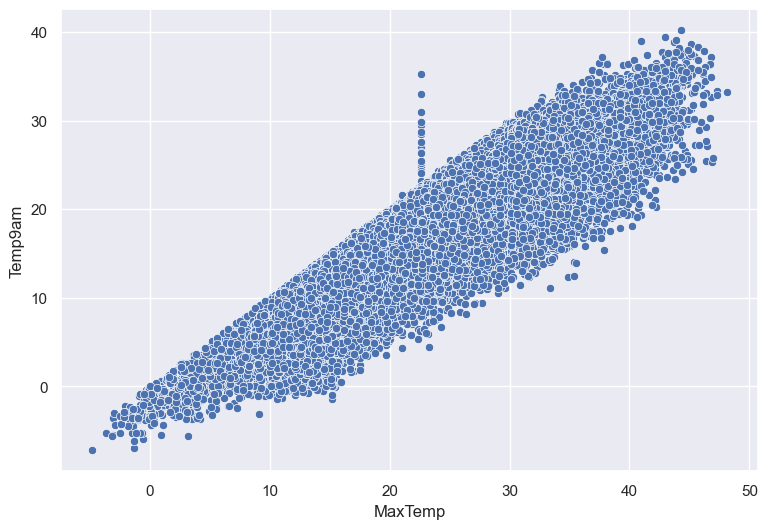

In [429]:
plt.figure(figsize = (9, 6))
sns.scatterplot(data = df_t, x = 'MaxTemp', y = 'Temp9am')
plt.show()

In [430]:
df_1 = df_t[df_t['MaxTemp'] <= 15]

In [431]:
df_2 = df_t[df_t['MaxTemp'] <= 25]
df_2 = df_2[df_2['MaxTemp'] > 15]

In [432]:
df_3 = df_t[df_t['MaxTemp'] > 25]

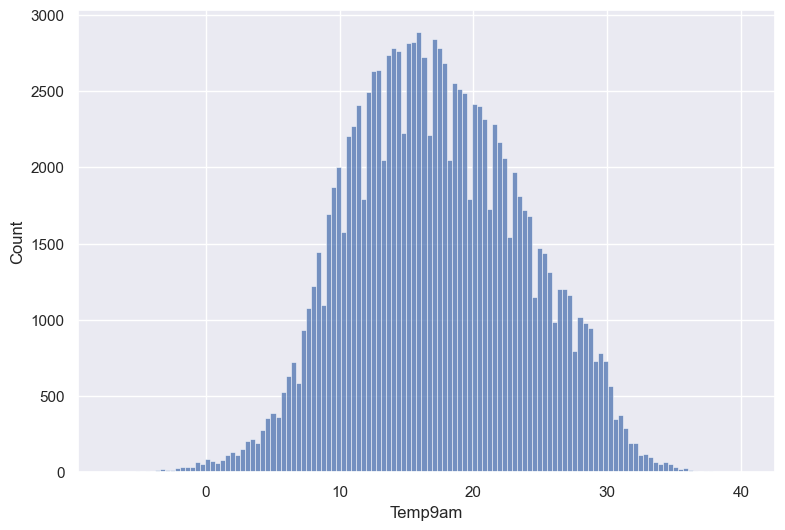

In [433]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df_t, x = 'Temp9am')
plt.show()

In [434]:
df_1['Temp9am'] = imputer.fit_transform(df_1[['Temp9am']])

In [435]:
df_2['Temp9am'] = imputer.fit_transform(df_2[['Temp9am']])

In [436]:
df_3['Temp9am'] = imputer.fit_transform(df_3[['Temp9am']])

In [437]:
df_1['Temp3pm'] = imputer.fit_transform(df_1[['Temp3pm']])

In [438]:
df_2['Temp3pm'] = imputer.fit_transform(df_2[['Temp3pm']])

In [439]:
df_3['Temp3pm'] = imputer.fit_transform(df_3[['Temp3pm']])

In [440]:
df_t = pd.concat([df_1, df_2, df_3])

In [441]:
df_t.shape

(123710, 23)

In [442]:
df_t.apply(pd.isnull).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [443]:
df_t.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean       12.415956      23.474582       2.375661       5.163435   
std         6.368303       7.205915       8.528039       3.512232   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.800000      18.100000       0.000000       2.400000   
50%        12.200000      23.000000       0.000000       5.200000   
75%        17.100000      28.600000       0.800000       6.600000   
max        33.900000      48.100000     367.600000      86.200000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean        7.951183      40.685280      15.011689      19.174578   
std         3.072709      13.388636       8.307285       8.571039   
min         0.000000       7.000000       2.000000       2.000000   
25%         5.900000      31.000000       9.000000      13.000000   
50%         9.200000      39.000000      13.000000      19.000000   
75%        10.200000      48.000000      20.000000      24.000000   
max        14.500000     135.000000      87.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean       67.692870      50.807631    1017.400418    1014.784576   
std        18.996681      20.871495       6.800979       6.752705   
min         0.000000       0.000000     980.500000     977.100000   
25%        56.000000      36.000000    1013.100000    1010.700000   
50%        69.000000      51.000000    1017.500000    1014.300000   
75%        81.000000      65.000000    1021.700000    1019.300000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  123710.000000  123710.000000  123710.000000  123710.000000  
mean        4.688150       4.500194      17.254352      21.922834  
std         2.595661       2.272529       6.488981       7.026333  
min         0.000000       0.000000      -7.200000      -5.400000  
25%         2.000000       2.000000      12.500000      16.700000  
50%         6.000000       5.000000      16.900000      21.400000  
75%         7.000000       6.000000      21.900000      26.900000  
max         9.000000       9.000000      40.200000      46.700000

In [444]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  140319.000000  140787.000000  140787.000000  81093.000000   
mean       12.184824      23.233735       2.349974      5.472516   
std         6.403879       7.106800       8.465173      4.189132   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  73982.000000  131682.000000  139732.000000  138256.000000   
mean       7.630540      39.970520      13.990496      18.631141   
std        3.781729      13.578201       8.886210       8.798096   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.700000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  139270.000000  137286.000000  127044.000000  127018.000000   
mean       68.826833      51.449288    1017.654577    1015.257963   
std        19.063650      20.807310       7.104867       7.035411   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.000000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  88162.000000  84693.000000  140131.000000  138163.000000  
mean       4.431161      4.499250      16.987066      21.693183  
std        2.886594      2.719752       6.496012       6.937784  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

In [445]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

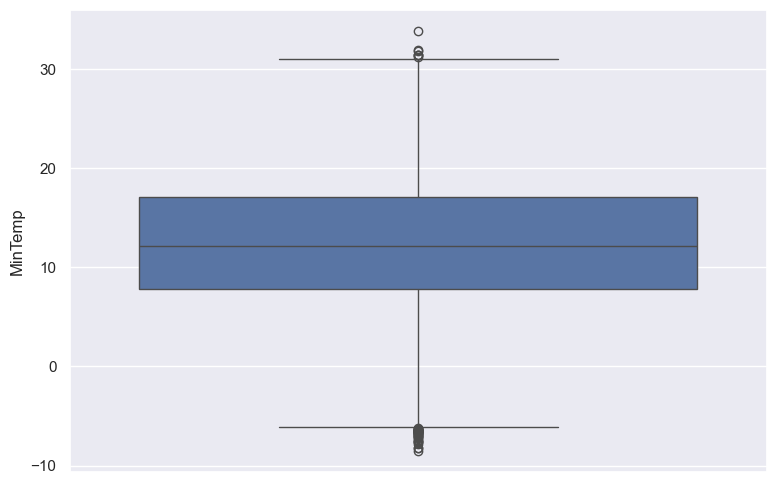

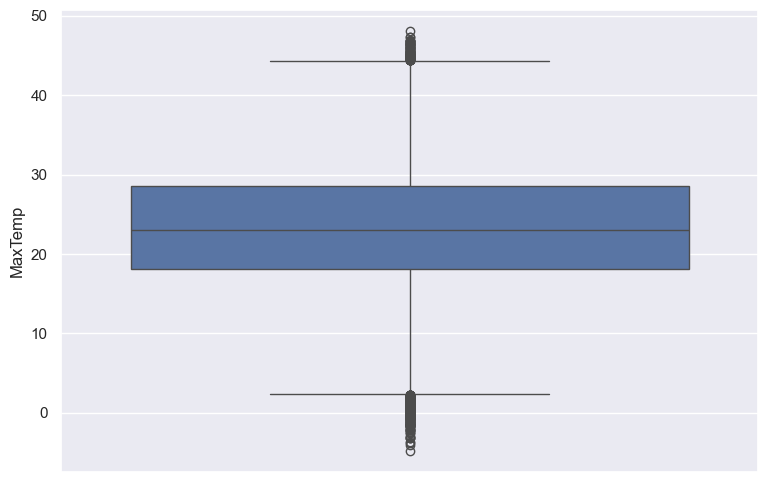

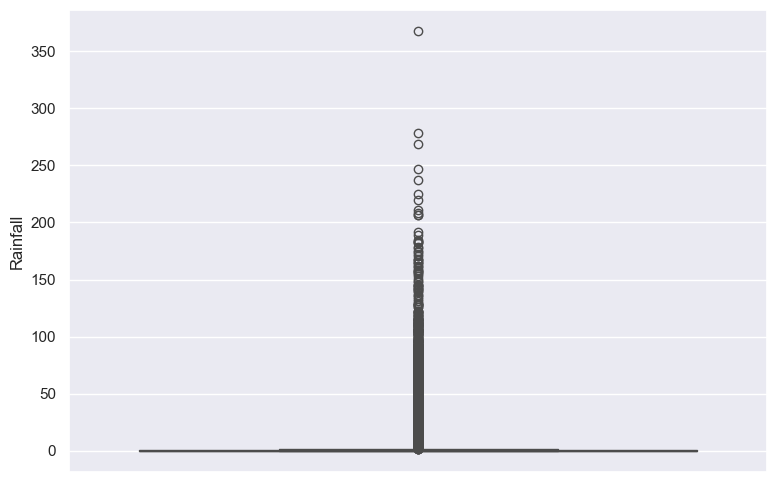

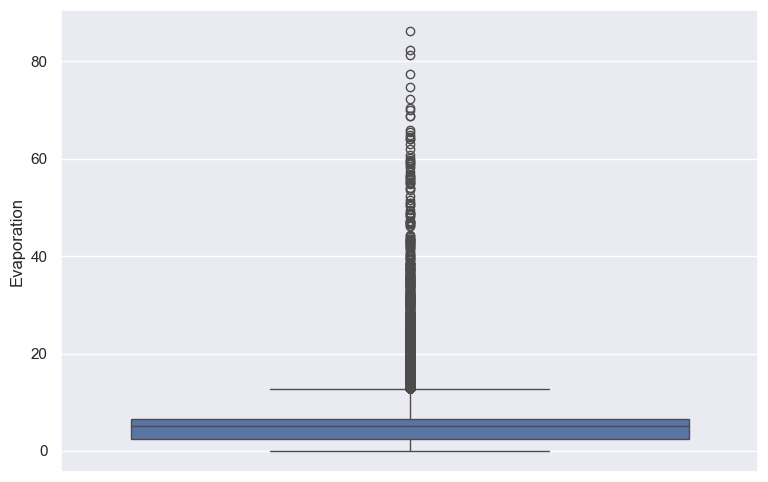

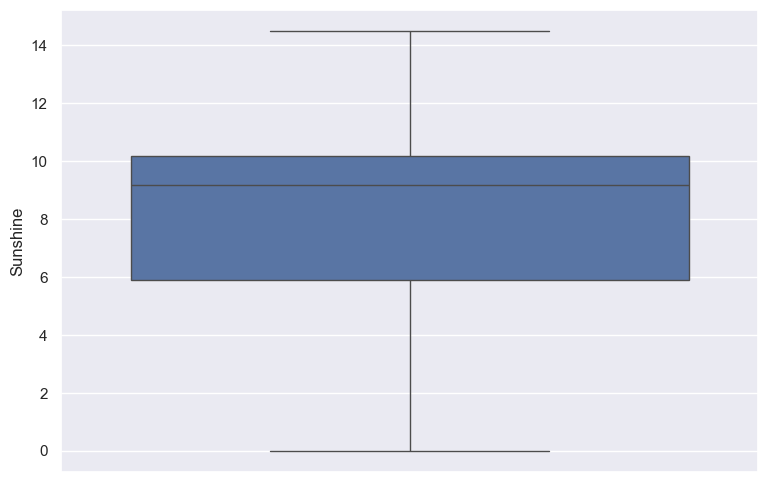

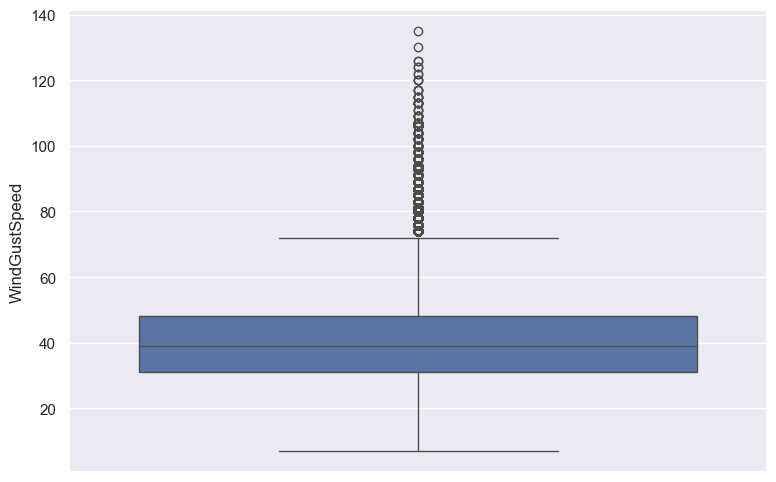

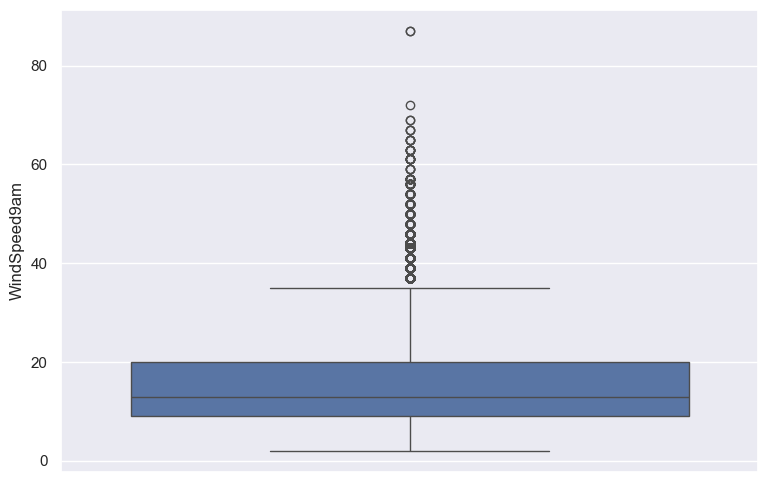

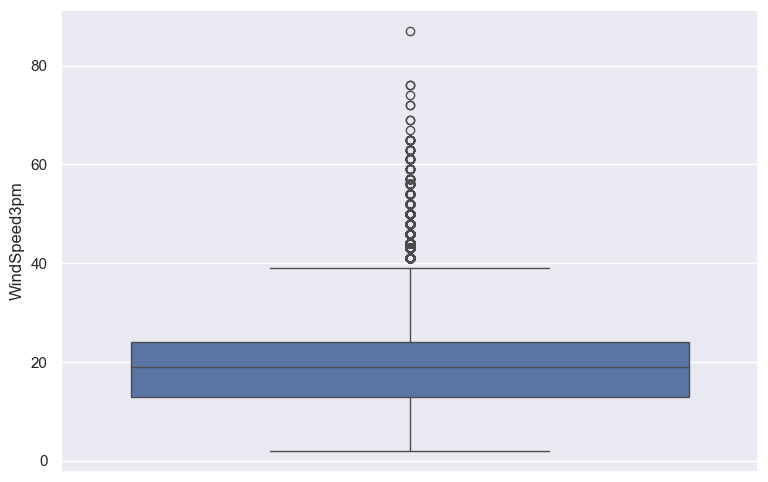

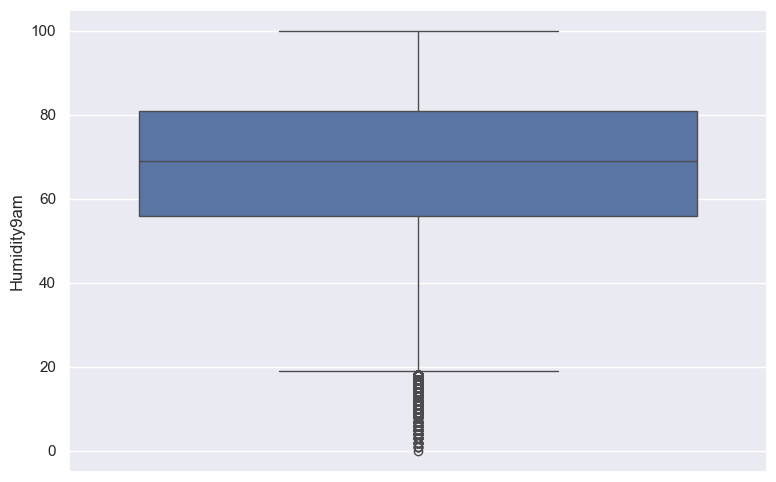

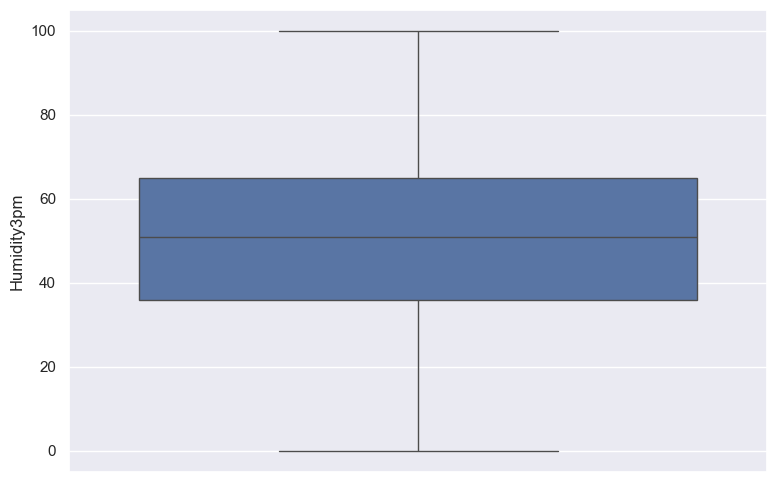

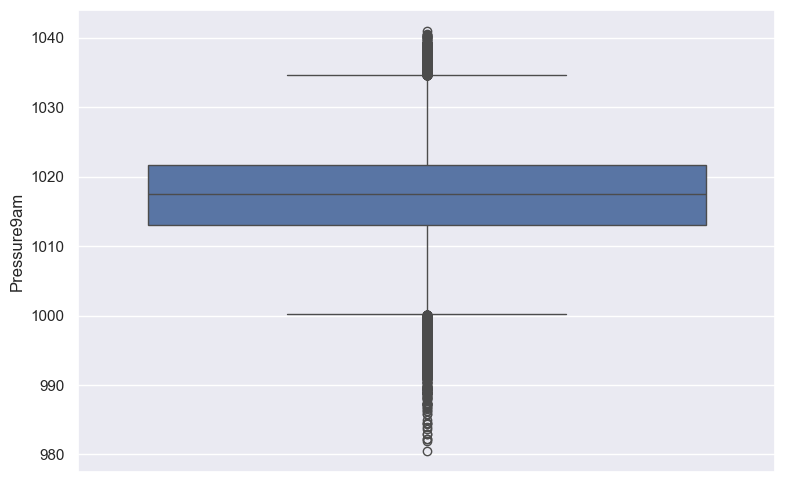

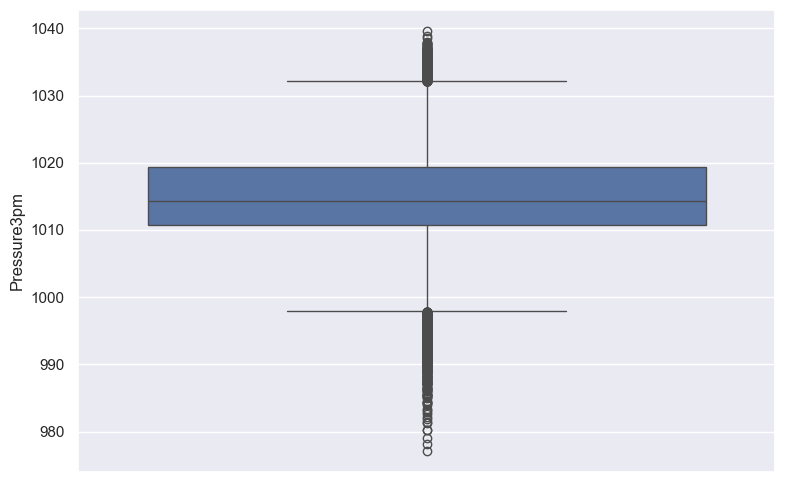

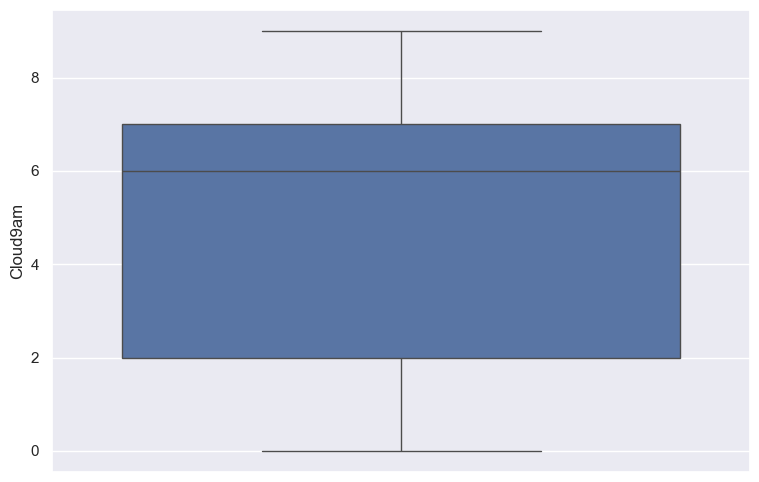

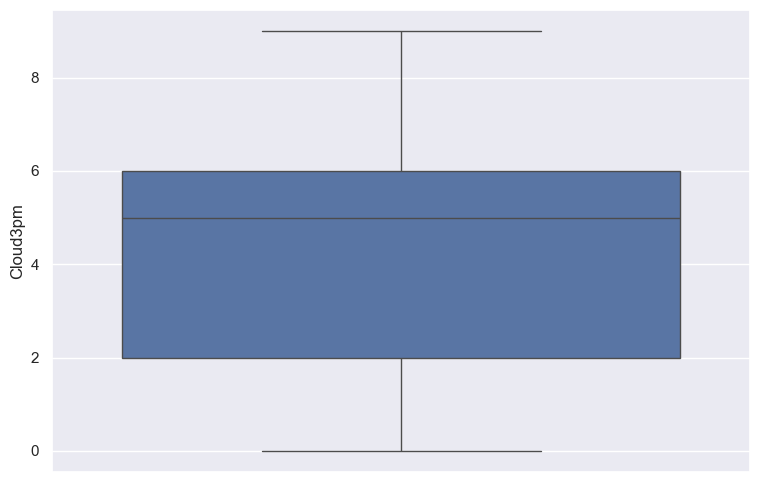

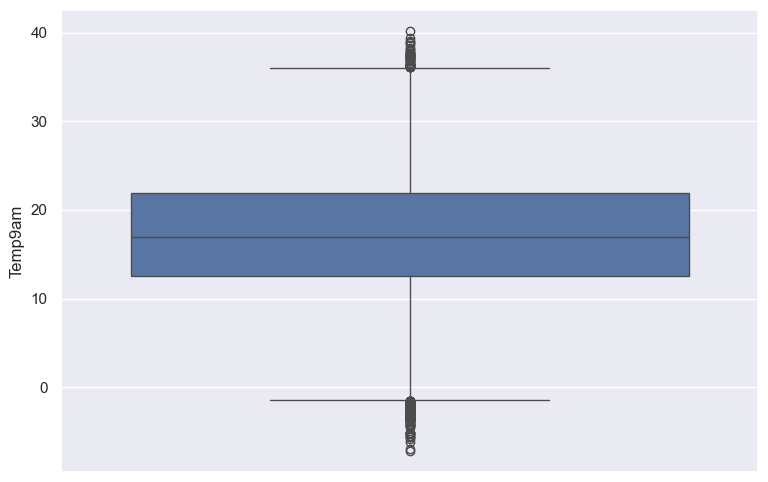

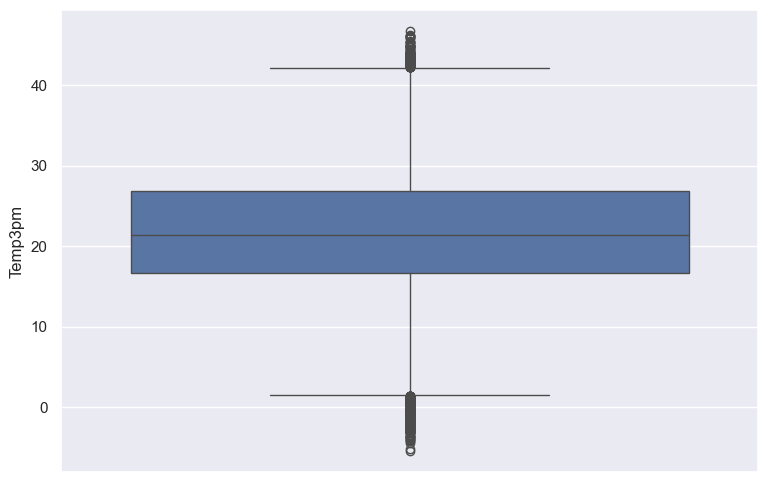

In [446]:
for i in numeric_cols:
    plt.figure(figsize = (9, 6))
    sns.boxplot(data = df_t, y = i)
    plt.show()

In [447]:
df_t[df_t['MinTemp'] > 31].shape

(7, 23)

In [448]:
df_t = df_t[df_t['MinTemp'] < 31]

In [449]:
df_t[df_t['MinTemp'] < -5].shape

(104, 23)

In [450]:
df_t = df_t[df_t['MinTemp'] > -5]

In [451]:
df_t.shape

(123588, 23)

In [452]:
df_t[df_t['MaxTemp'] > 43].shape

(259, 23)

In [453]:
df_t = df_t[df_t['MaxTemp'] < 43]

In [454]:
df_t[df_t['MaxTemp'] < 3].shape

(238, 23)

In [455]:
df_t = df_t[df_t['MaxTemp'] > 3]

In [456]:
df_t.shape

(123052, 23)

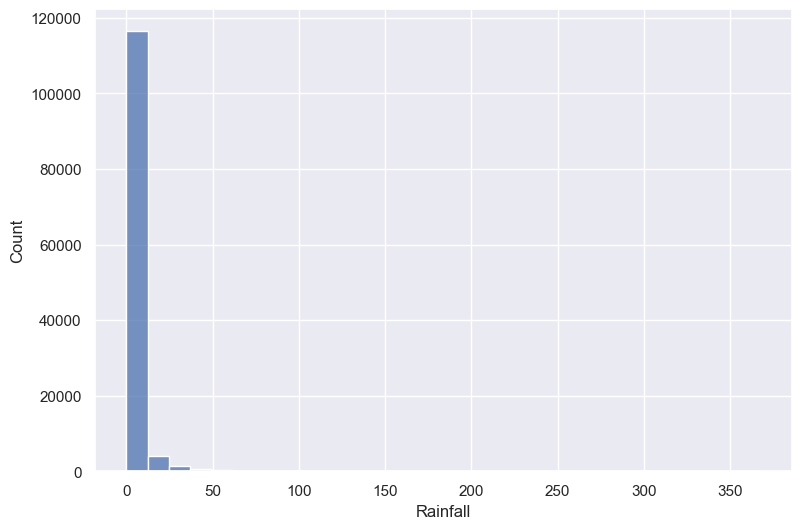

In [457]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df_t, x = 'Rainfall', bins = 30)
plt.show()

In [458]:
df_t[df_t['Rainfall'] > 10].shape

(8049, 23)

In [459]:
df_t = df_t[df_t['Rainfall'] < 10]

In [460]:
df_t.shape

(114841, 23)

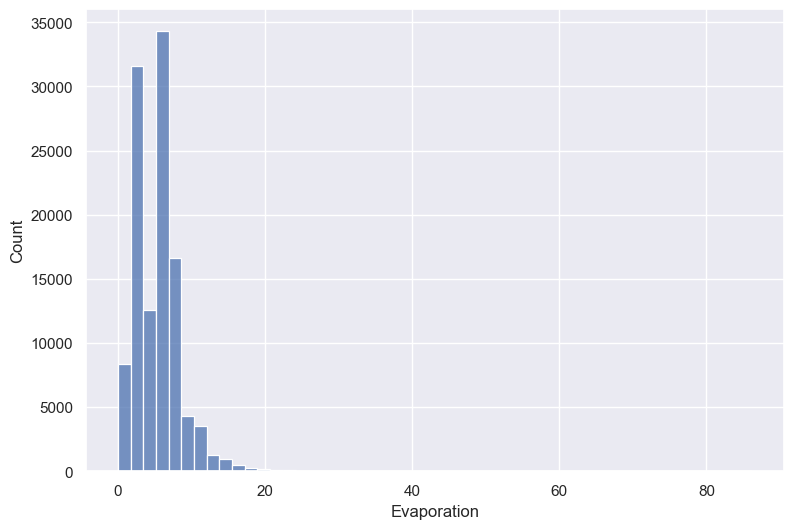

In [461]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df_t, x = 'Evaporation', bins = 50)
plt.show()

In [462]:
df_t[df_t['Evaporation'] > 14].shape

(2082, 23)

In [463]:
df_t = df_t[df_t['Evaporation'] < 14]

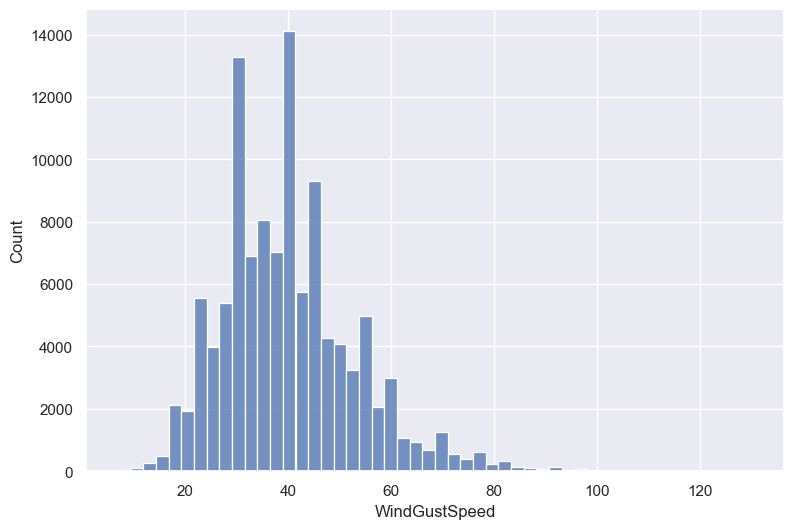

In [464]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df_t, x = 'WindGustSpeed', bins = 50)
plt.show()

In [465]:
df_t[df_t['WindGustSpeed'] > 73].shape

(2238, 23)

In [466]:
df_t = df_t[df_t['WindGustSpeed'] < 73]

In [467]:
df_t.shape

(110422, 23)

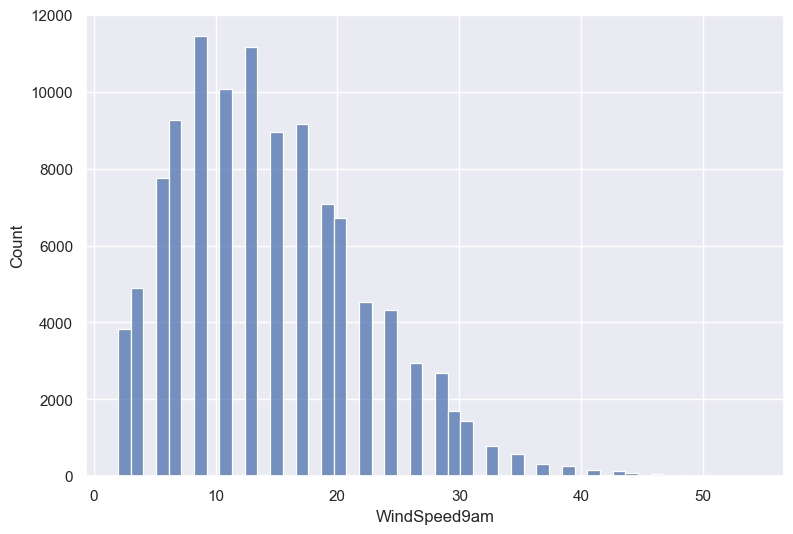

In [468]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df_t, x = 'WindSpeed9am', bins = 50)
plt.show()

In [469]:
df_t[df_t['WindSpeed9am'] > 32].shape

(2440, 23)

In [470]:
df_t = df_t[df_t['WindSpeed9am'] < 32]

In [471]:
df_t.shape

(107982, 23)

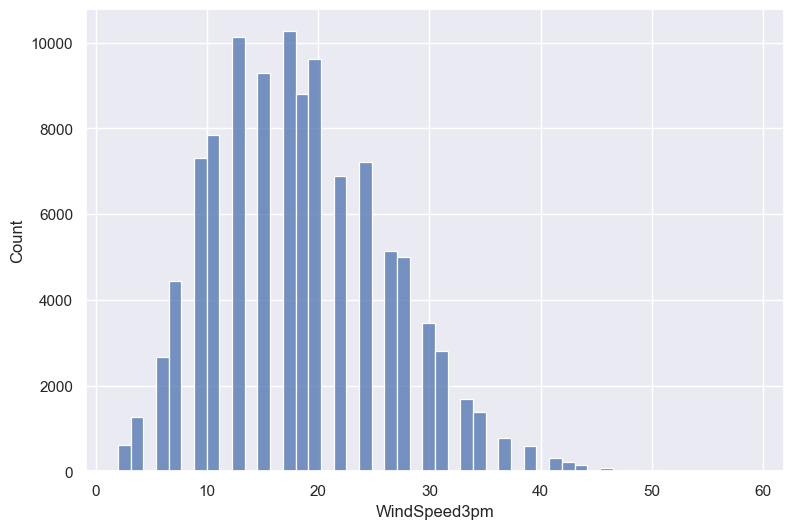

In [472]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df_t, x = 'WindSpeed3pm', bins = 50)
plt.show()

In [473]:
df_t[df_t['WindSpeed3pm'] > 40].shape

(819, 23)

In [474]:
df_t = df_t[df_t['WindSpeed3pm'] < 40]

In [475]:
df_t.shape

(107163, 23)

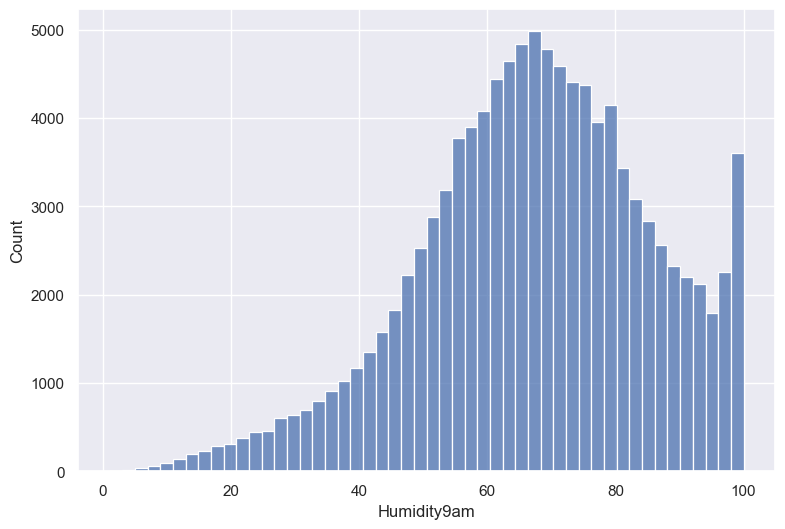

In [476]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df_t, x = 'Humidity9am', bins = 50)
plt.show()

In [477]:
df_t[df_t['Humidity9am'] < 20].shape

(1193, 23)

In [478]:
df_t = df_t[df_t['Humidity9am'] > 20]

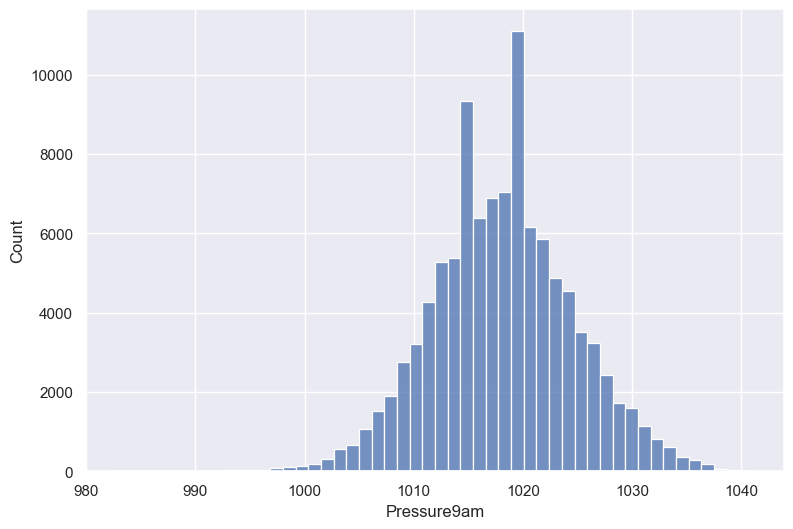

In [479]:
plt.figure(figsize = (9, 6))
sns.histplot(data = df_t, x = 'Pressure9am', bins = 50)
plt.show()

In [480]:
df_t[df_t['Pressure9am'] < 1000].shape

(438, 23)

In [481]:
df_t = df_t[df_t['Pressure9am'] > 1000]

In [482]:
df_t[df_t['Pressure9am'] > 1033].shape

(1403, 23)

In [483]:
df_t = df_t[df_t['Pressure9am'] < 1033]

In [484]:
df_t.shape

(103888, 23)

In [485]:
df_t[df_t['Pressure3pm'] < 1000].shape

(489, 23)

In [486]:
df_t = df_t[df_t['Pressure3pm'] > 1000]

In [487]:
df_t[df_t['Pressure3pm'] > 1030].shape

(496, 23)

In [488]:
df_t = df_t[df_t['Pressure3pm'] < 1030]

In [489]:
df_t.shape

(102840, 23)

In [490]:
df_t[df_t['Temp9am'] > 36].shape

(7, 23)

In [491]:
df_t = df_t[df_t['Temp9am'] < 36]

In [492]:
df_t[df_t['Temp9am'] < 0].shape

(99, 23)

In [493]:
df_t = df_t[df_t['Temp9am'] > 0]

In [494]:
df_t.shape

(102721, 23)

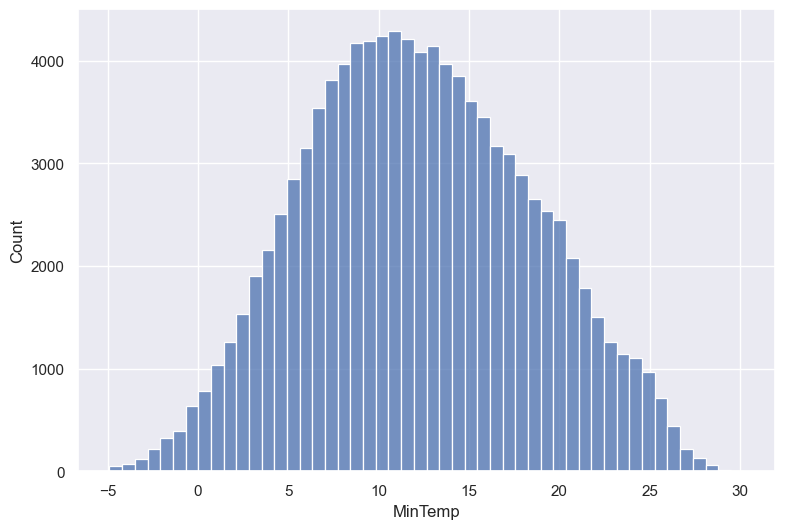

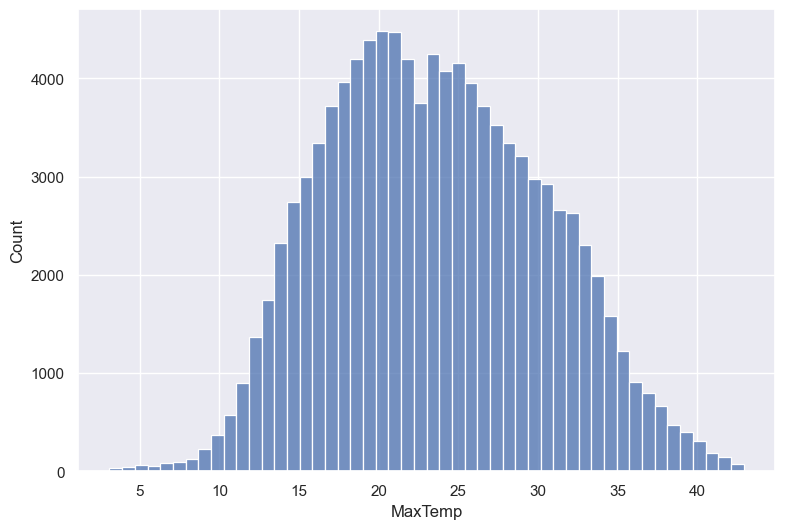

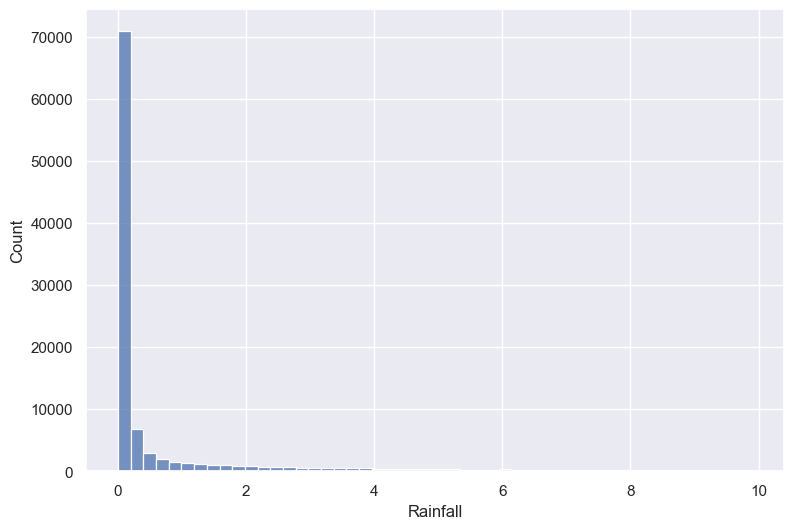

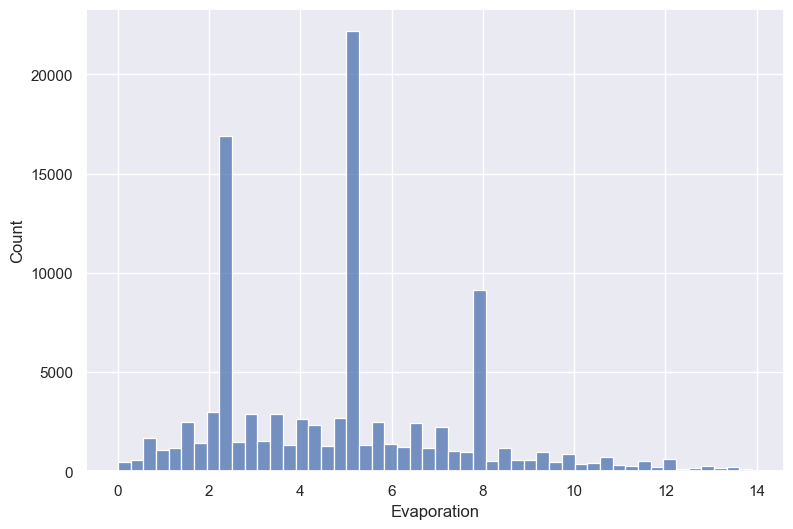

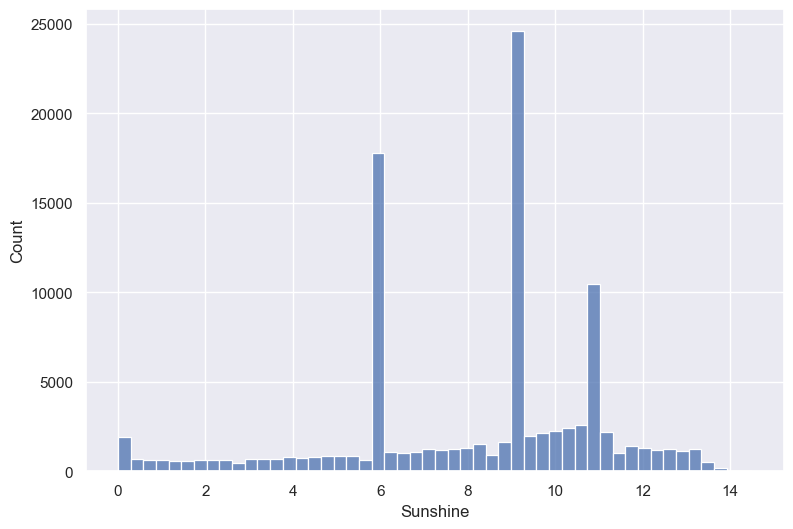

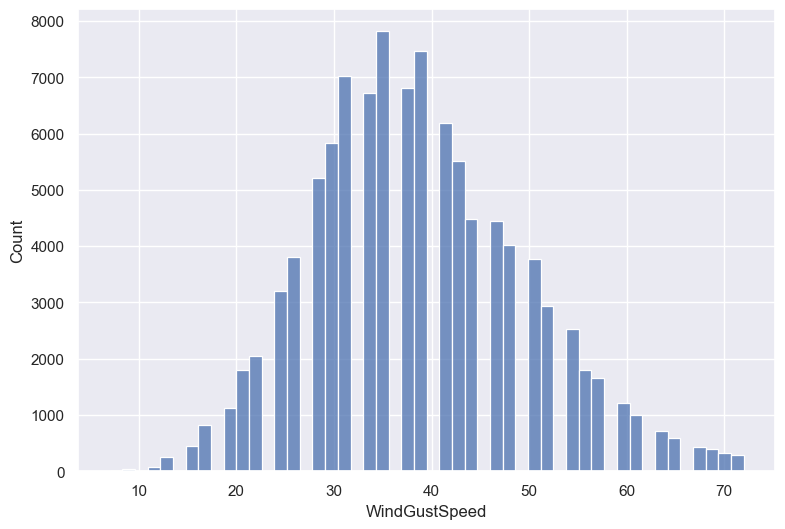

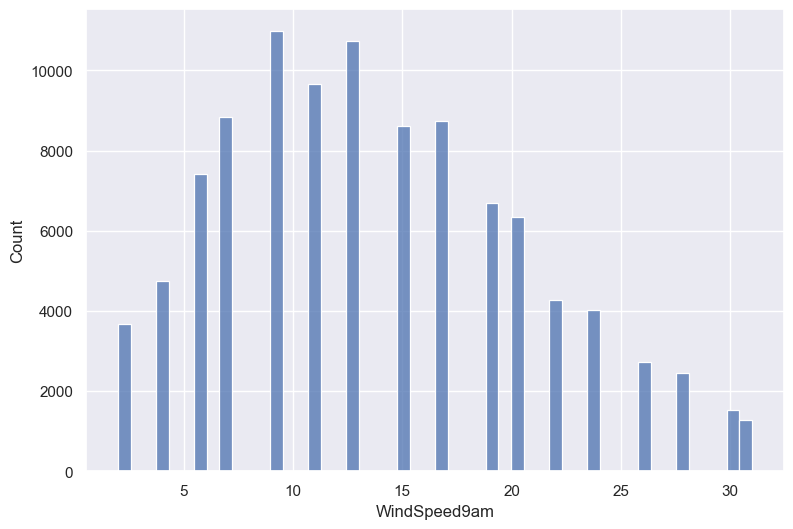

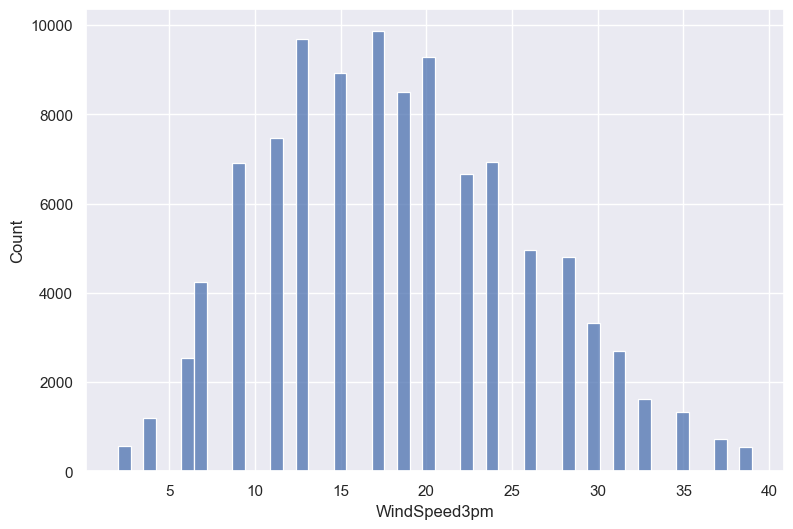

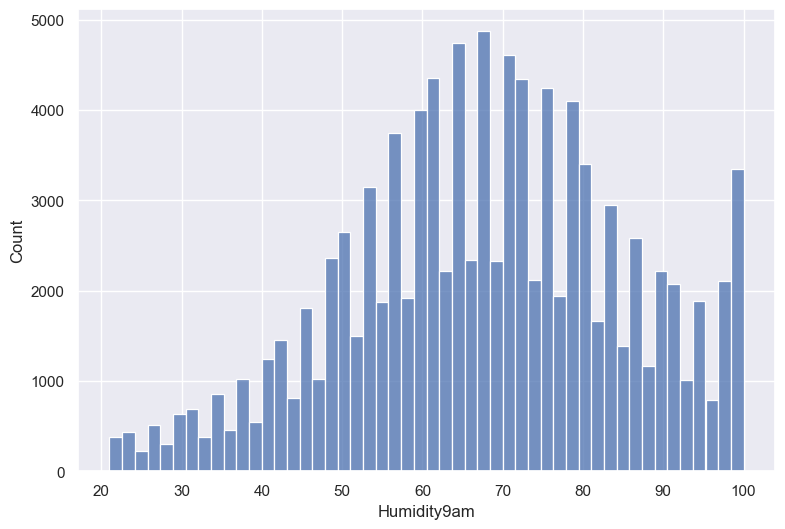

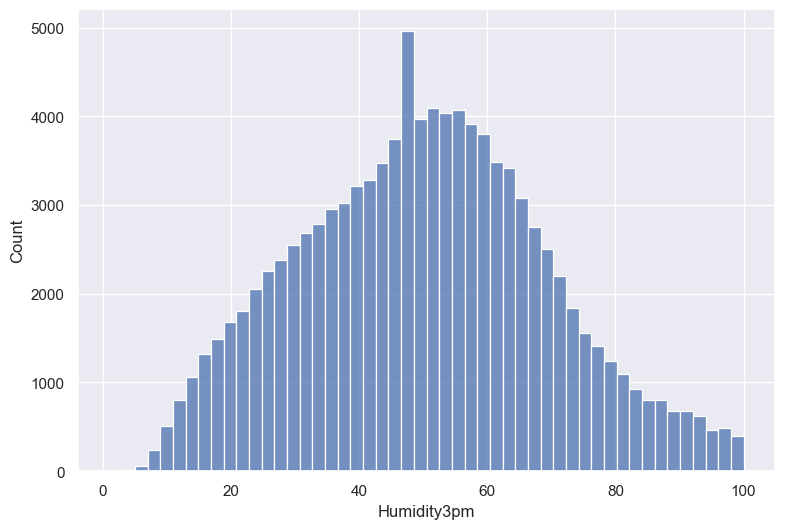

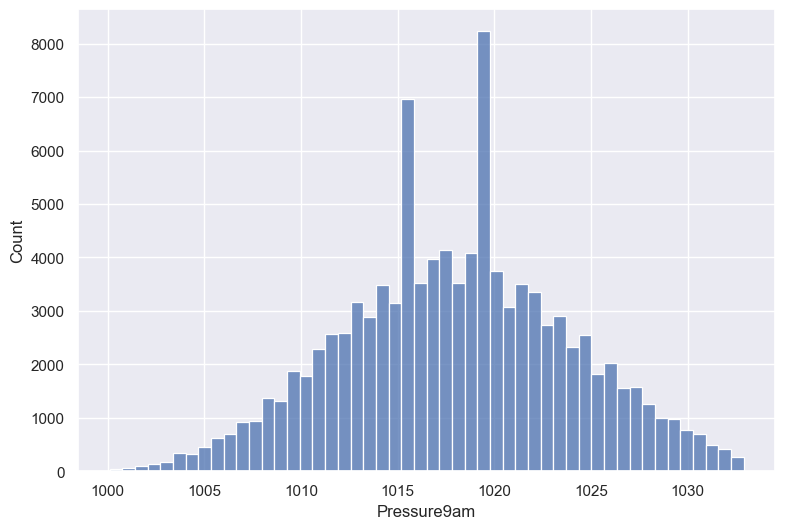

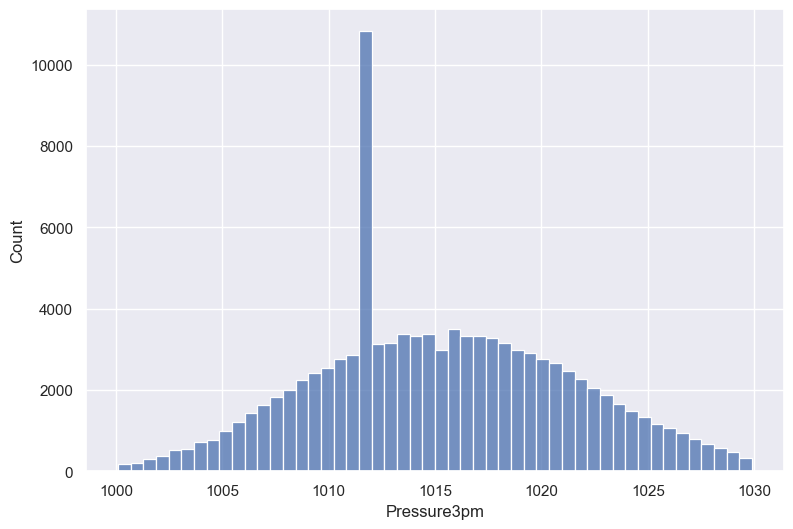

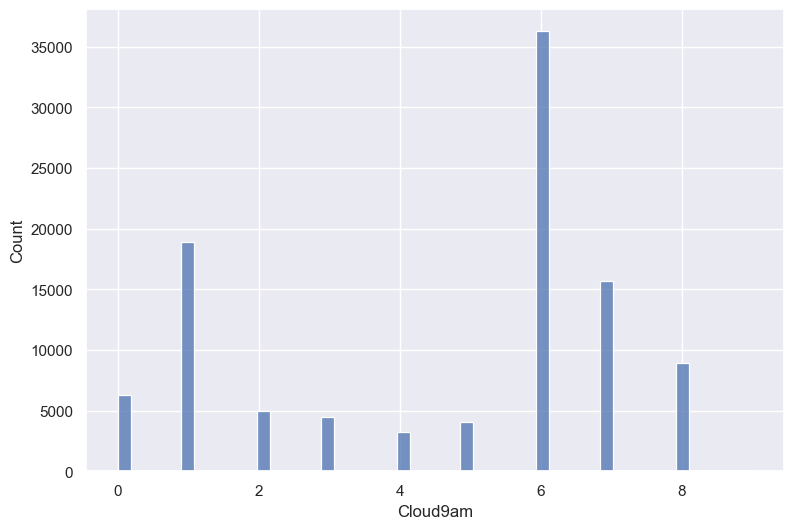

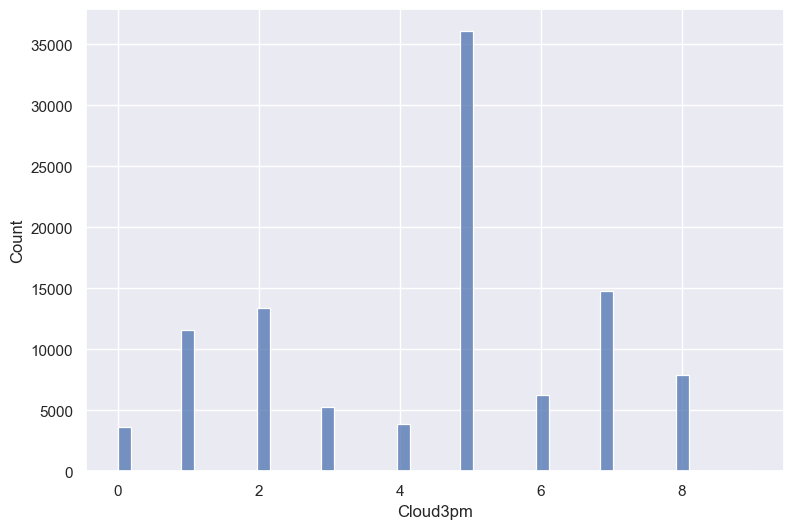

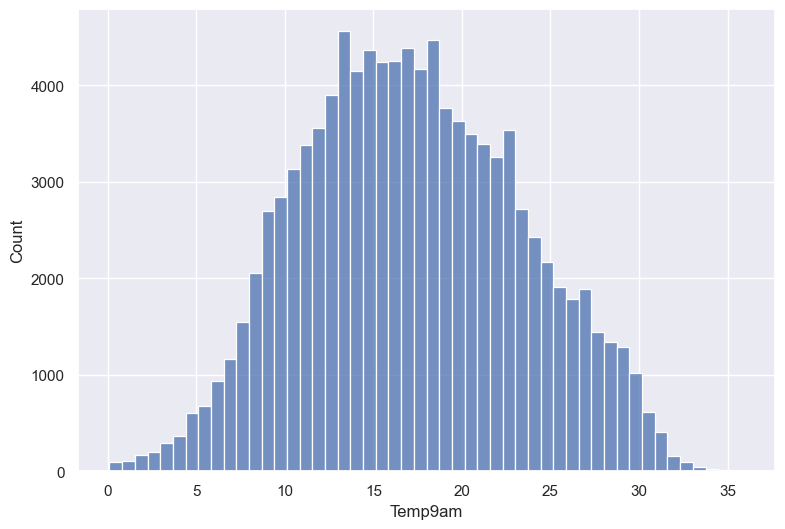

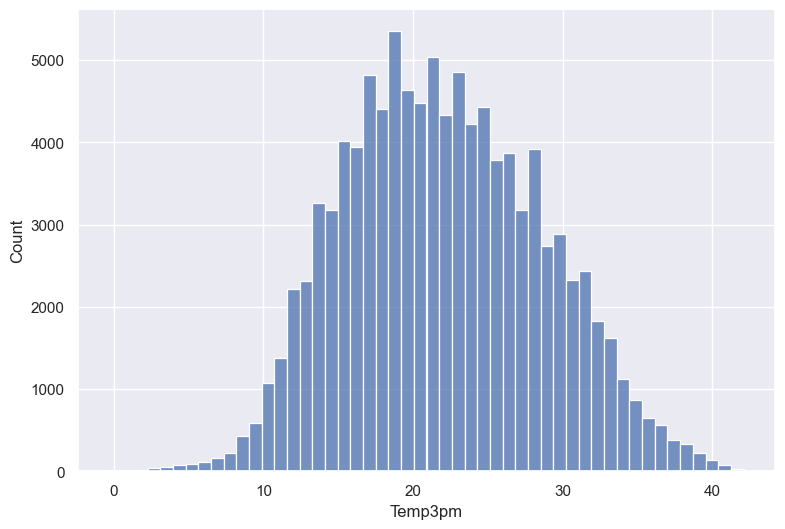

In [495]:
for i in numeric_cols:
    plt.figure(figsize = (9, 6))
    sns.histplot(data = df_t, x = i, bins = 50)
    plt.show()

In [496]:
year = pd.to_datetime(df_t['Date']).dt.year

In [497]:
df_train = df_t[year < 2015]
df_val = df_t[year == 2015]
df_test = df_t[year > 2015]

In [498]:
scaler = MinMaxScaler()

In [499]:
scaler.fit(df_train[numeric_cols])

MinMaxScaler()

In [500]:
scaler.data_min_

array([-4.9000e+00,  3.1000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        7.0000e+00,  2.0000e+00,  2.0000e+00,  2.1000e+01,  1.0000e+00,
        1.0001e+03,  1.0001e+03,  0.0000e+00,  0.0000e+00,  1.0000e-01,
       -3.0000e-01])

In [501]:
scaler.data_max_

array([  29.7,   42.9,    9.9,   13.9,   14.3,   72. ,   31. ,   39. ,
        100. ,  100. , 1032.9, 1029.9,    9. ,    9. ,   35.7,   42.1])

In [502]:
df_train[numeric_cols] = scaler.transform(df_train[numeric_cols])

In [503]:
scaler.fit(df_test[numeric_cols])

MinMaxScaler()

In [243]:
scaler.data_min_

array([-4.5000e+00,  3.2000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        9.0000e+00,  2.0000e+00,  2.0000e+00,  2.1000e+01,  5.0000e+00,
        1.0001e+03,  1.0001e+03,  0.0000e+00,  0.0000e+00,  1.0000e-01])

In [244]:
scaler.data_max_

array([  29.7,   42.9,    9.8,   13.8,   14.1,   72. ,   31. ,   39. ,
        100. ,  100. , 1032.9, 1029.9,    8. ,    8. ,   35.9])

In [245]:
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [246]:
df_val[numeric_cols] = scaler.fit_transform(df_val[numeric_cols])

In [504]:
df_train.head()

Date       Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
6206   2009-06-07          Cobar  0.329480  0.286432  0.343434     0.086331   
6214   2009-06-15          Cobar  0.277457  0.296482  0.000000     0.244604   
13614  2013-06-25          Moree  0.167630  0.185930  0.000000     0.187050   
33684  2009-06-14  SydneyAirport  0.401734  0.281407  0.000000     0.244604   
34424  2011-07-24  SydneyAirport  0.335260  0.291457  0.101010     0.201439   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6206   0.272727           W       0.323077        WNW  ...    0.734177   
6214   0.188811          NW       0.261538          N  ...    0.594937   
13614  0.048951         WNW       0.369231         NW  ...    0.708861   
33684  0.020979           N       0.261538         NW  ...    0.556962   
34424  0.328671           W       0.323077        WNW  ...    0.620253   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
6206      0.696970     0.341463     0.345638  0.222222  0.777778  0.283708   
6214      0.595960     0.393293     0.385906  0.666667  0.777778  0.219101   
13614     0.909091     0.545732     0.533557  0.777778  0.888889  0.191011   
33684     0.727273     0.432927     0.392617  0.666667  0.888889  0.311798   
34424     0.505051     0.603659     0.593960  0.666667  0.888889  0.275281   

        Temp3pm  RainToday  RainTomorrow  
6206   0.332547        Yes            No  
6214   0.339623         No            No  
13614  0.247642         No           Yes  
33684  0.327830         No           Yes  
34424  0.330189         No            No  

[5 rows x 23 columns]

In [505]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70699 entries, 6206 to 116050
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           70699 non-null  object 
 1   Location       70699 non-null  object 
 2   MinTemp        70699 non-null  float64
 3   MaxTemp        70699 non-null  float64
 4   Rainfall       70699 non-null  float64
 5   Evaporation    70699 non-null  float64
 6   Sunshine       70699 non-null  float64
 7   WindGustDir    70699 non-null  object 
 8   WindGustSpeed  70699 non-null  float64
 9   WindDir9am     70699 non-null  object 
 10  WindDir3pm     70699 non-null  object 
 11  WindSpeed9am   70699 non-null  float64
 12  WindSpeed3pm   70699 non-null  float64
 13  Humidity9am    70699 non-null  float64
 14  Humidity3pm    70699 non-null  float64
 15  Pressure9am    70699 non-null  float64
 16  Pressure3pm    70699 non-null  float64
 17  Cloud9am       70699 non-null  float64
 18  Cloud3p

In [506]:
X_train = df_train.drop(columns = ['Date', 'RainTomorrow'], axis = 1)
y_train = df_train['RainTomorrow']

In [507]:
X_test = df_test.drop(columns = ['Date', 'RainTomorrow'], axis = 1)
y_test = df_test['RainTomorrow']

In [508]:
X_val = df_val.drop(columns = ['Date', 'RainTomorrow'])
y_val = df_val['RainTomorrow']

In [511]:
X_train.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
6206           Cobar  0.329480  0.286432  0.343434     0.086331  0.272727   
6214           Cobar  0.277457  0.296482  0.000000     0.244604  0.188811   
13614          Moree  0.167630  0.185930  0.000000     0.187050  0.048951   
33684  SydneyAirport  0.401734  0.281407  0.000000     0.244604  0.020979   
34424  SydneyAirport  0.335260  0.291457  0.101010     0.201439  0.328671   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
6206            W       0.323077        WNW        WNW  ...      0.405405   
6214           NW       0.261538          N         NW  ...      0.297297   
13614         WNW       0.369231         NW          W  ...      0.459459   
33684           N       0.261538         NW          N  ...      0.108108   
34424           W       0.323077        WNW        WSW  ...      0.351351   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
6206      0.734177     0.696970     0.341463     0.345638  0.222222  0.777778   
6214      0.594937     0.595960     0.393293     0.385906  0.666667  0.777778   
13614     0.708861     0.909091     0.545732     0.533557  0.777778  0.888889   
33684     0.556962     0.727273     0.432927     0.392617  0.666667  0.888889   
34424     0.620253     0.505051     0.603659     0.593960  0.666667  0.888889   

        Temp9am   Temp3pm  RainToday  
6206   0.283708  0.332547        Yes  
6214   0.219101  0.339623         No  
13614  0.191011  0.247642         No  
33684  0.311798  0.327830         No  
34424  0.275281  0.330189         No  

[5 rows x 21 columns]

In [512]:
ct = ColumnTransformer([
    ('encoder', OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore'), [0, 6, 8, 9, 20])],
                        remainder = 'passthrough')

In [513]:
X_train = ct.fit_transform(X_train)

In [514]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.77777778, 0.28370787,
        0.33254717],
       [0.        , 0.        , 0.        , ..., 0.77777778, 0.21910112,
        0.33962264],
       [0.        , 0.        , 0.        , ..., 0.88888889, 0.19101124,
        0.24764151],
       ...,
       [0.        , 0.        , 0.        , ..., 0.22222222, 0.4241573 ,
        0.70990566],
       [0.        , 0.        , 0.        , ..., 0.22222222, 0.58146067,
        0.6745283 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.64606742,
        0.81839623]])

In [515]:
X_test = ct.transform(X_test)

In [516]:
X_test

array([[ 0. ,  0. ,  0. , ...,  6. , 12.9, 14.3],
       [ 0. ,  0. ,  0. , ...,  7. , 11.4, 12.2],
       [ 0. ,  0. ,  0. , ...,  7. , 10.1, 12. ],
       ...,
       [ 0. ,  0. ,  1. , ...,  2. , 19.5, 29. ],
       [ 0. ,  0. ,  0. , ...,  2. , 16.6, 29.4],
       [ 0. ,  0. ,  0. , ...,  2. , 18. , 29.9]])

In [517]:
X_val = ct.fit_transform(X_val)

In [518]:
X_val

array([[ 0. ,  0. ,  0. , ...,  7. , 12.1, 14.5],
       [ 0. ,  0. ,  0. , ...,  7. ,  7.9, 11.4],
       [ 0. ,  0. ,  0. , ...,  8. ,  9.8, 12.1],
       ...,
       [ 0. ,  0. ,  0. , ...,  2. , 18.1, 33.5],
       [ 0. ,  0. ,  0. , ...,  6. , 14.4, 32.1],
       [ 0. ,  0. ,  0. , ...,  7. , 20.9, 29.7]])

In [519]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.     

In [523]:
print('The training set shape:', X_train.shape)
print('The test set shape:', X_test.shape)
print('The validation set shape:', X_val.shape)

The training set shape: (70699, 108)
The test set shape: (19353, 108)
The validation set shape: (12669, 108)


In [524]:
y_train

6206       No
6214       No
13614     Yes
33684     Yes
34424      No
         ... 
27968      No
67832      No
99958      No
116297     No
116050     No
Name: RainTomorrow, Length: 70699, dtype: object

In [526]:
le = LabelEncoder()

In [528]:
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_val_le = le.transform(y_val)

In [529]:
y_train_le

array([0, 0, 1, ..., 0, 0, 0])

In [530]:
y_test_le

array([1, 1, 0, ..., 0, 0, 0])

In [531]:
y_val_le

array([0, 0, 1, ..., 1, 0, 0])

In [533]:
model = LogisticRegression(solver = 'liblinear')

In [534]:
model.fit(X_train, y_train_le)

LogisticRegression(solver='liblinear')

In [535]:
print(model.coef_)

[[ 0.07690234 -0.28962969 -0.01029009 -0.65721562 -0.1499163  -0.06330501
  -0.5572914  -0.31608299 -0.02714494 -0.43017412 -0.49201771 -1.05443842
  -0.44117635 -0.97132035 -1.40028307 -0.74395158 -0.53249306 -0.73916192
  -0.21967161 -0.35368873 -0.28279549 -2.00581241 -0.27677658 -1.00703609
  -0.75346072 -0.44375488 -0.18460305 -0.63809752  0.16222565 -0.03985996
  -0.34327136 -0.19610072 -0.68467935 -0.48542742 -0.54587473 -0.60020187
  -1.21321965 -0.18675866  0.01100284 -0.08564879 -0.3200357  -0.56526971
  -0.36278739  0.16944274 -1.37378612 -0.48016936 -0.03470267  0.09058709
   0.01022151 -0.029603   -0.12355383  0.111057    0.17441769  0.090077
   0.12572812  0.12010458  0.15840551  0.10258538  0.09643638  0.08060895
   0.08953637  0.28364555 -0.02190538  0.36755301  0.35888025  0.46463876
   0.15080956  0.15032366 -0.09580262 -0.10774339 -0.07740742  0.10889681
   0.25567336  0.27399268  0.19169615  0.27748213 -0.02326252 -0.10319456
   0.08884388 -0.17050409 -0.00651848  0

In [537]:
model.intercept_

array([-5.88841085])

In [538]:
train_preds = model.predict(X_train)

In [539]:
train_preds

array([1, 0, 1, ..., 0, 0, 0])

In [540]:
y_train_le

array([0, 0, 1, ..., 0, 0, 0])

In [542]:
print(classification_report(y_train_le, train_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     57461
           1       0.72      0.45      0.56     13238

    accuracy                           0.86     70699
   macro avg       0.80      0.71      0.74     70699
weighted avg       0.85      0.86      0.85     70699



In [543]:
model.predict_proba(X_train)

array([[0.44893409, 0.55106591],
       [0.64481184, 0.35518816],
       [0.35404951, 0.64595049],
       ...,
       [0.97421477, 0.02578523],
       [0.90302003, 0.09697997],
       [0.97518517, 0.02481483]])

In [547]:
cvs = cross_val_score(model, X_train, y_train_le, cv = 5)

In [548]:
print('The validation accuracy:', cvs.mean())

The validation accuracy: 0.8208179678566202


In [549]:
valpreds = model.predict(X_val)

In [551]:
print(classification_report(y_val_le, valpreds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     10329
           1       0.00      0.00      0.00      2340

    accuracy                           0.82     12669
   macro avg       0.41      0.50      0.45     12669
weighted avg       0.66      0.82      0.73     12669



In [552]:
testpreds = model.predict(X_test)

In [553]:
print(classification_report(y_test_le, testpreds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     15621
           1       0.00      0.00      0.00      3732

    accuracy                           0.81     19353
   macro avg       0.40      0.50      0.45     19353
weighted avg       0.65      0.81      0.72     19353



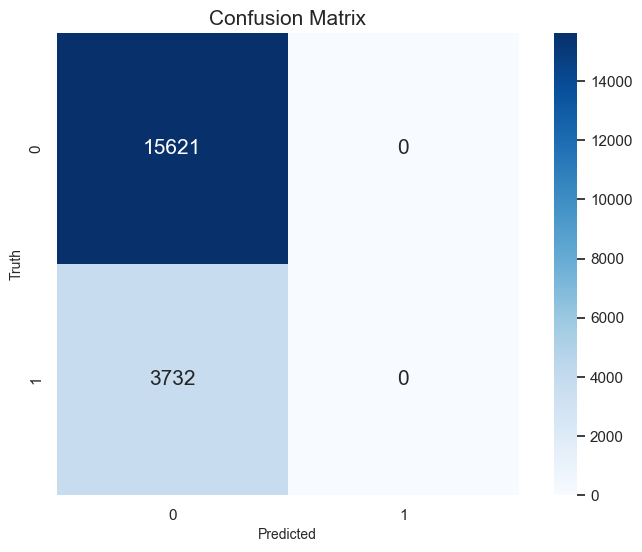

In [555]:
plt.figure(figsize = (9, 6))
sns.heatmap(confusion_matrix(y_test_le, testpreds), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd',
            cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [556]:
len(y_test_le)

19353

In [559]:
zeros = np.zeros(len(y_test_le))

In [560]:
zeros

array([0., 0., 0., ..., 0., 0., 0.])

In [561]:
print(classification_report(y_test_le, zeros))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     15621
           1       0.00      0.00      0.00      3732

    accuracy                           0.81     19353
   macro avg       0.40      0.50      0.45     19353
weighted avg       0.65      0.81      0.72     19353



In [576]:
df_t['RainTomorrow'].value_counts()

RainTomorrow
No     83411
Yes    19310
Name: count, dtype: int64

In [579]:
df_yes = df_t[df_t['RainTomorrow'] == 'Yes']
df_no = df_t[df_t['RainTomorrow'] == 'No'].sample(df_yes.shape[0])

In [580]:
df_balanced = pd.concat([df_yes, df_no])

In [581]:
df_balanced.shape

(38620, 23)

In [582]:
df_balanced['RainTomorrow'].value_counts()

RainTomorrow
Yes    19310
No     19310
Name: count, dtype: int64

In [583]:
df_balanced.head()

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
13614  2013-06-25          Moree      0.9     10.5       0.0          2.6   
33126  2016-05-28         Sydney      9.8     14.8       0.0          5.6   
33212  2016-08-22         Sydney      9.5     13.8       0.0          3.0   
33684  2009-06-14  SydneyAirport      9.0     14.3       0.0          3.4   
34752  2012-06-16  SydneyAirport     11.3     14.8       0.2          1.8   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
13614       0.7         WNW           31.0         NW  ...        77.0   
33126       2.1           W           39.0        NNW  ...        63.0   
33212       0.2           W           35.0        WNW  ...        66.0   
33684       0.3           N           24.0         NW  ...        65.0   
34752       0.0           N           33.0        NNW  ...        79.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
13614         91.0       1018.0       1016.0       7.0       8.0      6.9   
33126         70.0       1007.2       1006.0       6.0       6.0     12.9   
33212         67.0       1016.8       1015.0       7.0       7.0     11.4   
33684         73.0       1014.3       1011.8       6.0       8.0     11.2   
34752         89.0       1018.0       1014.2       8.0       8.0     13.0   

       Temp3pm  RainToday  RainTomorrow  
13614     10.2         No           Yes  
33126     14.3         No           Yes  
33212     12.2         No           Yes  
33684     13.6         No           Yes  
34752     14.4         No           Yes  

[5 rows x 23 columns]

In [584]:
X = df_balanced.drop(columns = ['Date', 'RainTomorrow'], axis = 1)
y = df_balanced['RainTomorrow']

In [585]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True, stratify = y)

In [587]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30896 entries, 90910 to 75008
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       30896 non-null  object 
 1   MinTemp        30896 non-null  float64
 2   MaxTemp        30896 non-null  float64
 3   Rainfall       30896 non-null  float64
 4   Evaporation    30896 non-null  float64
 5   Sunshine       30896 non-null  float64
 6   WindGustDir    30896 non-null  object 
 7   WindGustSpeed  30896 non-null  float64
 8   WindDir9am     30896 non-null  object 
 9   WindDir3pm     30896 non-null  object 
 10  WindSpeed9am   30896 non-null  float64
 11  WindSpeed3pm   30896 non-null  float64
 12  Humidity9am    30896 non-null  float64
 13  Humidity3pm    30896 non-null  float64
 14  Pressure9am    30896 non-null  float64
 15  Pressure3pm    30896 non-null  float64
 16  Cloud9am       30896 non-null  float64
 17  Cloud3pm       30896 non-null  float64
 18  Temp9am

In [588]:
ct2 = ColumnTransformer([
    ('scaler', MinMaxScaler(), [1, 2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
    ('encoder', OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore'), [0, 6, 8, 9, 20])],
                        remainder = 'passthrough')

In [589]:
X_train_ct = ct2.fit_transform(X_train)

In [590]:
X_train_ct

array([[0.58404558, 0.41561713, 0.2244898 , ..., 0.        , 0.        ,
        1.        ],
       [0.84900285, 0.82619647, 0.57142857, ..., 0.        , 0.        ,
        1.        ],
       [0.31623932, 0.41813602, 0.04081633, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.45299145, 0.34760705, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70655271, 0.70780856, 0.06122449, ..., 0.        , 0.        ,
        0.        ],
       [0.66096866, 0.9093199 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [591]:
X_test_ct = ct2.transform(X_test)

In [592]:
X_test_ct

array([[0.48433048, 0.53400504, 0.16326531, ..., 0.        , 0.        ,
        1.        ],
       [0.64957265, 0.45843829, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34188034, 0.41057935, 0.02040816, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22507123, 0.5743073 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6980057 , 0.60453401, 0.63265306, ..., 0.        , 0.        ,
        1.        ],
       [0.44159544, 0.4861461 , 0.10204082, ..., 0.        , 0.        ,
        0.        ]])

In [593]:
y_train = le.fit_transform(y_train)

In [594]:
y_test = le.fit_transform(y_test)

In [595]:
model3 = LogisticRegression(solver = 'liblinear')

In [596]:
cvs_t = cross_val_score(model3, X_train_ct, y_train, cv = 5)

In [597]:
print('The validation accuracy:', cvs_t.mean())

The validation accuracy: 0.7807805852477674


In [598]:
model3.fit(X_train_ct, y_train)

LogisticRegression(solver='liblinear')

In [599]:
y_predict = model3.predict(X_test_ct)

In [600]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      3862
           1       0.79      0.76      0.77      3862

    accuracy                           0.78      7724
   macro avg       0.78      0.78      0.78      7724
weighted avg       0.78      0.78      0.78      7724



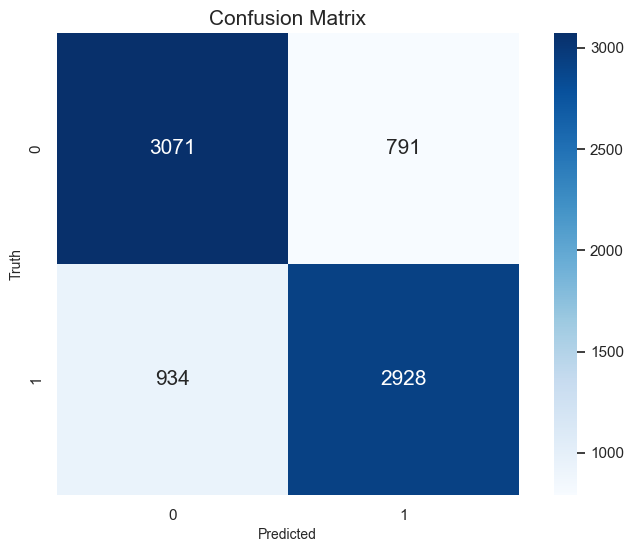

In [601]:
plt.figure(figsize = (9, 6))
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd',
            cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()